In [1]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 seaborn==0.13.1 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.2 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mizani 0.13.1 requires pandas>=2

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/ottdata.csv")

In [5]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [6]:
data.shape

(1000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


In [9]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [12]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Univariate analysis**

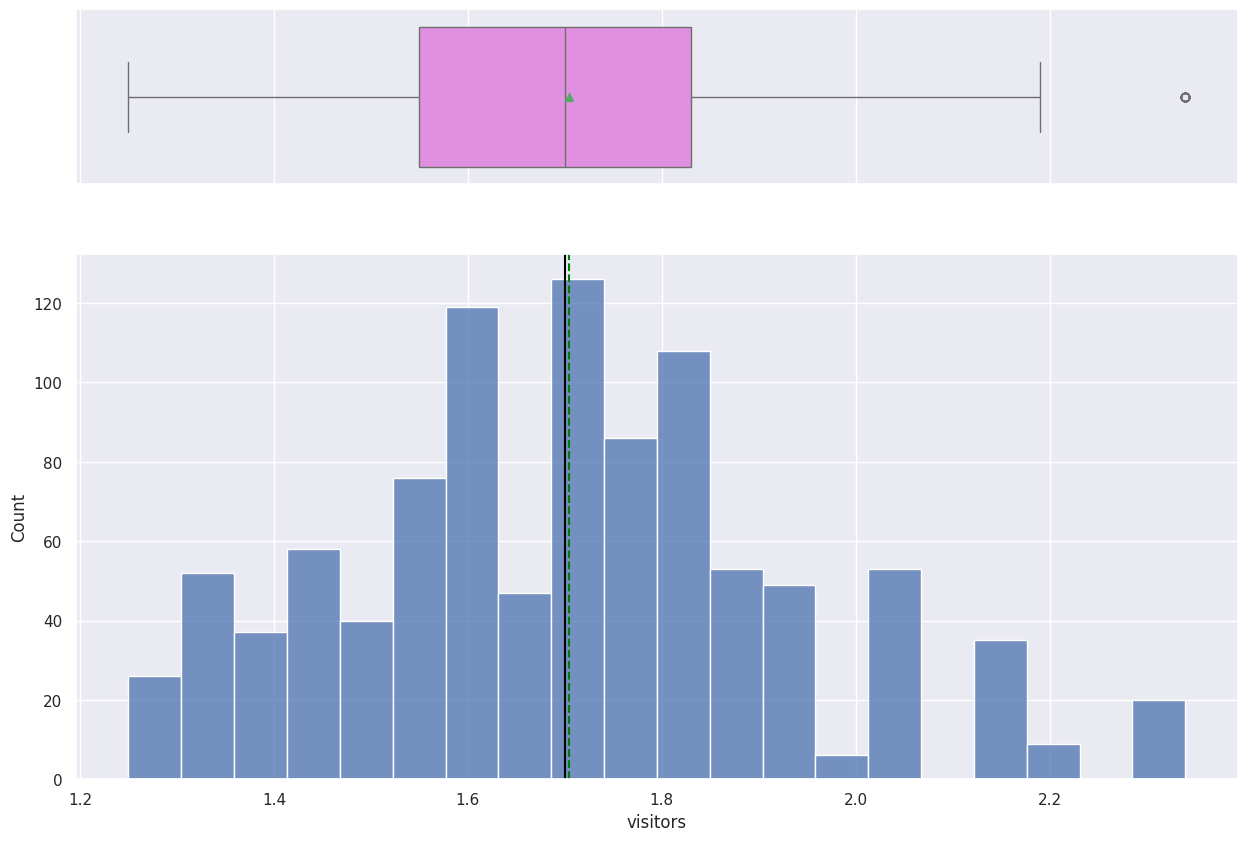

In [15]:
histogram_boxplot(df, "visitors")

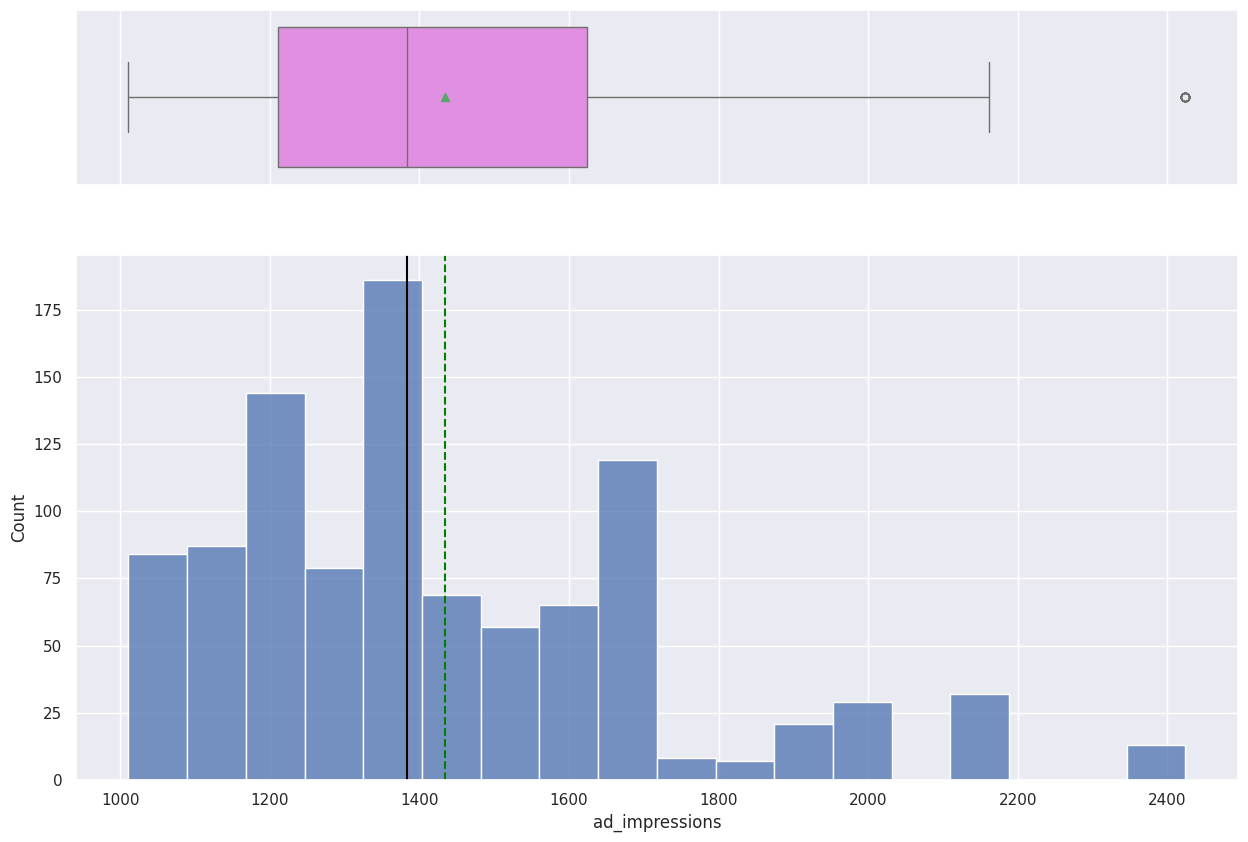

In [16]:
histogram_boxplot(df, "ad_impressions")

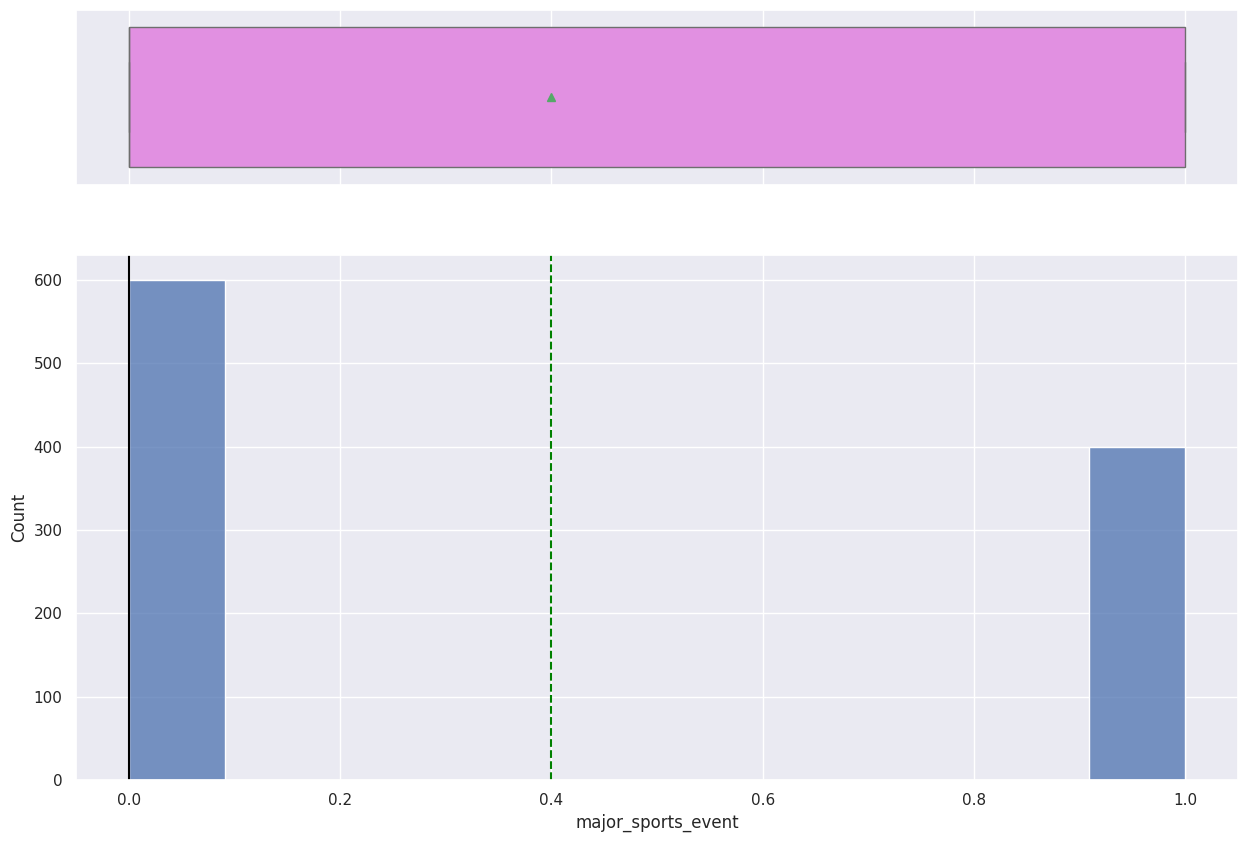

In [17]:
histogram_boxplot(df, "major_sports_event")

TypeError: Could not convert string 'HorrorThrillerThrillerSci-FiSci-FiThrillerOthersHorrorDramaActionDramaSci-FiOthersDramaOthersHorrorThrillerSci-FiSci-FiComedyOthersThrillerComedySci-FiHorrorSci-FiOthersSci-FiOthersOthersSci-FiOthersActionHorrorOthersActionThrillerComedyDramaComedySci-FiRomanceRomanceDramaRomanceDramaOthersHorrorHorrorOthersOthersDramaActionHorrorHorrorRomanceThrillerActionActionActionRomanceSci-FiActionThrillerOthersThrillerSci-FiComedyOthersRomanceComedyDramaRomanceComedyOthersSci-FiThrillerOthersActionHorrorSci-FiHorrorActionHorrorActionDramaSci-FiSci-FiDramaDramaRomanceOthersHorrorSci-FiOthersOthersComedyRomanceActionActionOthersOthersDramaOthersDramaRomanceHorrorOthersOthersDramaOthersRomanceThrillerOthersThrillerActionOthersOthersDramaHorrorComedyOthersThrillerOthersSci-FiOthersComedyRomanceSci-FiComedyOthersThrillerOthersOthersComedyHorrorActionComedyHorrorActionActionActionDramaThrillerSci-FiDramaOthersComedyDramaRomanceThrillerThrillerHorrorHorrorOthersOthersOthersOthersSci-FiActionSci-FiSci-FiHorrorSci-FiRomanceOthersHorrorHorrorRomanceDramaRomanceDramaSci-FiHorrorComedyThrillerOthersRomanceSci-FiOthersDramaRomanceSci-FiHorrorRomanceHorrorOthersComedyRomanceRomanceRomanceOthersHorrorOthersSci-FiDramaComedyOthersThrillerComedyRomanceActionActionThrillerDramaDramaThrillerOthersComedyOthersSci-FiSci-FiActionComedyDramaOthersRomanceOthersThrillerSci-FiThrillerDramaDramaDramaSci-FiDramaActionThrillerActionHorrorOthersOthersHorrorHorrorActionHorrorHorrorActionActionDramaOthersComedyThrillerActionComedyRomanceHorrorDramaComedyDramaActionActionDramaActionDramaRomanceOthersThrillerHorrorOthersOthersDramaActionOthersOthersActionOthersRomanceOthersDramaRomanceSci-FiDramaOthersSci-FiComedyRomanceDramaRomanceActionComedyThrillerActionRomanceSci-FiHorrorDramaDramaComedyOthersRomanceOthersDramaOthersOthersOthersSci-FiOthersSci-FiThrillerDramaOthersActionComedyThrillerSci-FiThrillerOthersOthersOthersSci-FiHorrorOthersHorrorThrillerHorrorHorrorThrillerSci-FiThrillerDramaOthersThrillerComedyActionComedyDramaThrillerOthersHorrorRomanceOthersRomanceComedyOthersDramaHorrorHorrorActionDramaThrillerHorrorOthersHorrorSci-FiRomanceComedyComedyHorrorRomanceHorrorOthersActionOthersComedyDramaOthersActionDramaComedyDramaSci-FiRomanceComedyRomanceHorrorOthersComedySci-FiComedyActionHorrorComedyOthersThrillerComedySci-FiComedyComedyActionOthersOthersActionOthersThrillerDramaComedyOthersDramaDramaSci-FiSci-FiComedyComedyThrillerComedyActionHorrorComedyHorrorActionOthersSci-FiHorrorOthersActionRomanceSci-FiHorrorHorrorOthersOthersRomanceActionRomanceOthersOthersThrillerDramaHorrorThrillerThrillerOthersSci-FiHorrorActionThrillerHorrorOthersThrillerRomanceActionActionSci-FiDramaDramaRomanceRomanceSci-FiDramaActionComedyRomanceOthersHorrorDramaHorrorThrillerThrillerThrillerHorrorHorrorComedyThrillerThrillerOthersSci-FiSci-FiRomanceComedyDramaOthersOthersOthersRomanceRomanceActionComedyHorrorHorrorRomanceComedyComedyRomanceSci-FiSci-FiRomanceActionOthersActionRomanceOthersOthersOthersOthersOthersHorrorActionActionRomanceHorrorActionActionRomanceComedyThrillerOthersHorrorOthersActionRomanceComedySci-FiRomanceOthersOthersThrillerComedyRomanceThrillerOthersOthersOthersOthersDramaRomanceActionThrillerRomanceOthersDramaComedyOthersSci-FiActionRomanceThrillerOthersRomanceSci-FiOthersOthersComedyOthersActionOthersActionHorrorDramaOthersSci-FiComedyActionOthersSci-FiComedyDramaDramaSci-FiComedyOthersSci-FiHorrorHorrorComedyComedySci-FiThrillerActionOthersOthersRomanceDramaActionRomanceComedyComedyOthersOthersDramaSci-FiThrillerDramaRomanceHorrorOthersComedyComedyOthersOthersActionRomanceOthersComedySci-FiRomanceOthersDramaActionOthersOthersOthersRomanceHorrorThrillerActionComedyDramaOthersOthersOthersOthersComedyDramaThrillerHorrorOthersActionComedyDramaDramaThrillerOthersComedyComedyOthersHorrorComedyDramaOthersThrillerThrillerThrillerThrillerSci-FiOthersActionOthersComedyOthersComedyActionSci-FiActionOthersOthersSci-FiThrillerSci-FiDramaOthersOthersDramaActionOthersSci-FiOthersRomanceDramaActionOthersRomanceSci-FiOthersOthersThrillerOthersComedyOthersOthersSci-FiOthersOthersHorrorOthersComedyThrillerComedyThrillerThrillerOthersComedyDramaThrillerComedyRomanceRomanceOthersHorrorOthersThrillerComedyActionComedyRomanceOthersComedyThrillerOthersOthersActionOthersActionSci-FiThrillerDramaDramaOthersHorrorHorrorThrillerOthersDramaHorrorDramaRomanceComedyOthersThrillerOthersHorrorOthersSci-FiThrillerComedyComedyThrillerOthersOthersThrillerRomanceSci-FiRomanceComedyComedyOthersHorrorComedyOthersComedyHorrorDramaDramaRomanceComedyComedyComedySci-FiDramaRomanceOthersOthersOthersOthersOthersComedyThrillerRomanceOthersOthersThrillerOthersDramaThrillerOthersOthersOthersOthersHorrorOthersOthersRomanceOthersSci-FiDramaOthersSci-FiSci-FiComedyThrillerDramaOthersHorrorThrillerRomanceOthersOthersDramaOthersThrillerDramaThrillerRomanceOthersThrillerRomanceDramaThrillerHorrorThrillerDramaRomanceRomanceDramaOthersOthersSci-FiRomanceSci-FiThrillerOthersOthersOthersOthersHorrorOthersOthersThrillerOthersHorrorOthersHorrorOthersActionDramaThrillerComedySci-FiActionHorrorComedyThrillerOthersOthersOthersOthersThrillerActionHorrorDramaThrillerHorrorThrillerSci-FiHorrorOthersComedyRomanceOthersRomanceOthersOthersDramaActionOthersThrillerOthersHorrorThrillerHorrorThrillerThrillerActionOthersThrillerHorrorRomanceSci-FiActionActionOthersOthersComedyComedyActionOthersDramaSci-FiOthersRomanceDramaRomanceThrillerRomanceHorrorSci-FiComedyActionSci-FiThrillerComedyOthersSci-FiOthersOthersActionOthersActionComedyActionSci-FiRomanceComedyOthersDramaOthersActionOthersRomanceOthersThrillerThrillerDramaThrillerDramaThrillerSci-FiSci-FiDramaOthersOthersDramaComedyComedyHorrorThrillerRomanceThrillerSci-FiOthersOthersComedyHorrorRomanceActionOthersOthersHorrorActionComedyActionOthersSci-FiRomanceSci-FiRomanceActionRomanceOthersHorrorRomanceOthersDramaActionDramaHorrorRomanceDramaComedyOthersActionThrillerOthersSci-FiOthersSci-FiOthersDramaHorrorOthersHorrorOthersThrillerOthersComedyOthersThrillerSci-FiThrillerSci-FiActionSci-FiHorrorOthersOthersDramaActionDramaSci-FiComedyDramaOthersComedyRomanceOthersRomanceSci-FiRomanceOthersDramaThrillerComedyThrillerOthersActionRomanceActionSci-FiRomanceComedy' to numeric

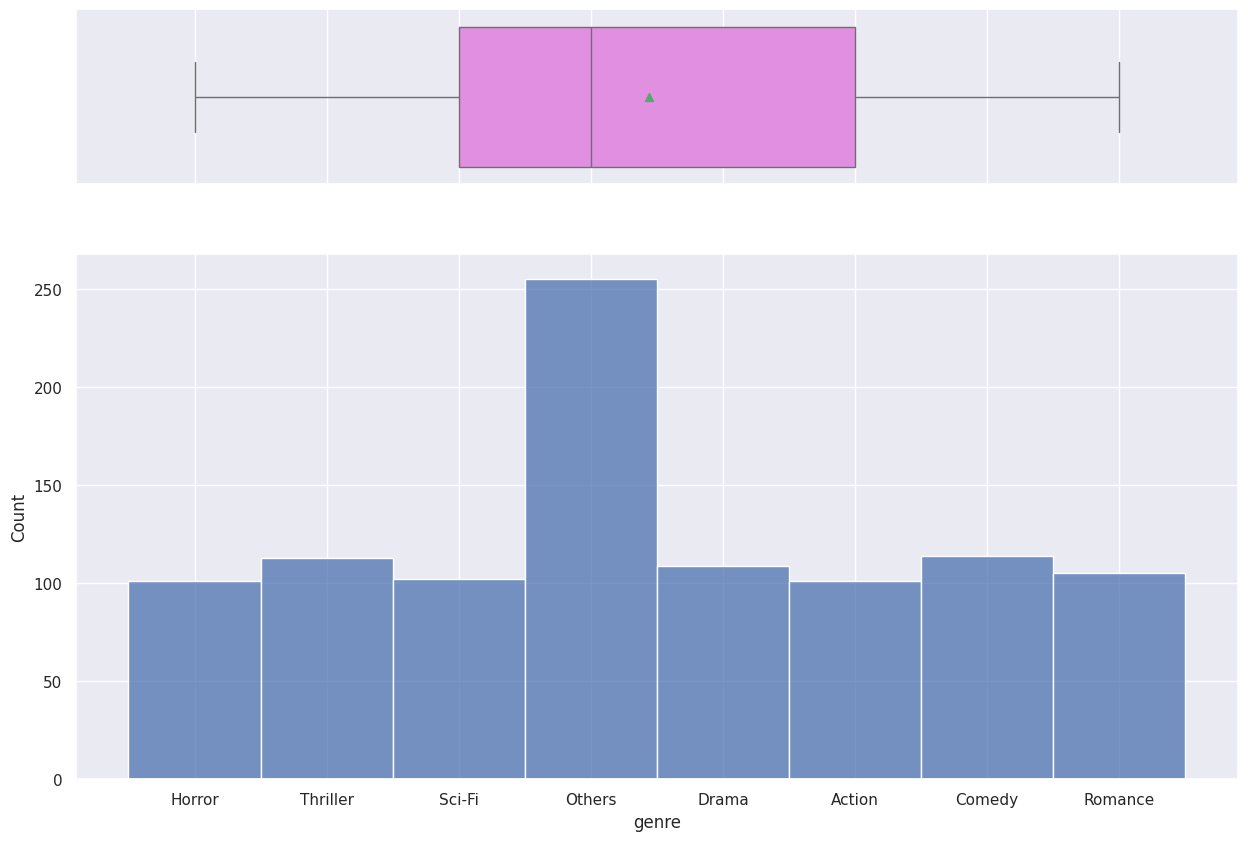

In [18]:
histogram_boxplot(df,"genre")

TypeError: Could not convert string 'WednesdayFridayWednesdayFridaySundaySundayThursdayFridayFridayWednesdayWednesdayWednesdayFridayFridayWednesdayMondayWednesdaySaturdaySaturdayFridayWednesdayWednesdaySaturdaySaturdayFridayWednesdayWednesdayThursdayFridaySaturdayWednesdayThursdayFridayWednesdayFridayFridayWednesdayThursdayThursdaySaturdayFridayTuesdayFridayWednesdayThursdayTuesdayFridayFridayWednesdayFridayWednesdayWednesdayFridayFridayFridayFridayThursdayWednesdayWednesdayWednesdayThursdayFridayFridayFridayThursdayFridayFridayWednesdayTuesdayFridayFridayWednesdayWednesdayWednesdayFridayWednesdayFridayThursdaySaturdayFridayThursdayFridayFridayWednesdayFridaySundaySundaySaturdayFridayTuesdayFridayTuesdaySaturdayFridayFridayWednesdayWednesdayWednesdayWednesdayWednesdaySundayFridayFridayFridayWednesdayWednesdayFridayFridayFridayWednesdayThursdayFridayFridaySundaySundaySundayFridayFridayWednesdaySaturdayWednesdayFridayMondayThursdayWednesdayFridayWednesdayFridayWednesdayThursdayFridaySundayWednesdaySundayFridayWednesdayWednesdayWednesdaySundayWednesdayFridayWednesdayWednesdayFridayFridayThursdayMondayWednesdaySaturdayThursdayFridaySundayFridayFridaySaturdaySaturdayFridayWednesdayFridayWednesdayWednesdaySaturdayWednesdayWednesdayWednesdayFridayWednesdayMondaySaturdayThursdayFridayFridayWednesdayWednesdaySaturdayThursdayWednesdaySundayWednesdayWednesdayWednesdayFridayFridayWednesdayFridaySaturdayWednesdayThursdayFridayWednesdayFridayThursdaySaturdayWednesdaySaturdayWednesdayWednesdayFridayWednesdayWednesdayFridayWednesdayWednesdayThursdayFridayFridayFridayThursdaySaturdayFridayWednesdayThursdayThursdayWednesdayWednesdaySaturdayFridaySaturdayWednesdayWednesdayFridayWednesdayWednesdayWednesdayFridayWednesdayFridaySundayWednesdayFridayThursdayWednesdayWednesdaySaturdaySaturdayFridayFridayWednesdayFridayFridayWednesdayWednesdayFridayFridayWednesdayFridayThursdayFridayFridayMondayThursdayThursdayWednesdayThursdayWednesdayFridaySaturdayWednesdayWednesdayWednesdayFridayMondayWednesdayFridayFridayFridaySundayFridayWednesdayFridayFridaySaturdayWednesdayWednesdayFridayFridayFridayTuesdayWednesdayWednesdaySaturdayTuesdayFridayWednesdayFridayFridayWednesdayWednesdayFridayFridayWednesdaySundayFridayThursdayMondayThursdaySundayThursdayWednesdayWednesdayWednesdaySaturdayFridayFridayFridayWednesdayFridayThursdayWednesdayWednesdayWednesdayFridaySaturdayWednesdayFridaySaturdayTuesdaySundaySaturdayThursdaySundayWednesdayWednesdayWednesdayFridayFridayFridayFridaySaturdayTuesdayWednesdayWednesdaySaturdayFridayFridayFridayFridayWednesdayWednesdaySaturdayWednesdayTuesdayThursdayWednesdayWednesdaySaturdayThursdayWednesdayFridayWednesdayFridayThursdaySaturdayFridayFridayFridayFridayWednesdayWednesdayWednesdayThursdayWednesdayFridaySaturdayFridayWednesdayWednesdayThursdayFridayFridayWednesdaySundayWednesdayTuesdayWednesdayWednesdayFridayFridayTuesdayWednesdayThursdayFridayFridayTuesdaySundayFridayWednesdayThursdayWednesdayFridayFridayWednesdayWednesdayWednesdayWednesdayFridayWednesdayThursdayWednesdaySundayFridaySaturdayFridayWednesdayFridayWednesdayFridayFridaySaturdayThursdayWednesdaySundayFridayThursdayFridayFridayMondayWednesdayMondayFridayFridayFridayFridayFridaySundayWednesdayFridayWednesdayWednesdayThursdaySaturdayFridayThursdayWednesdayFridayWednesdayWednesdayWednesdayFridayFridayFridaySundayWednesdaySaturdayWednesdayWednesdayWednesdayFridayFridayWednesdayWednesdayFridayFridayFridaySundayFridaySundaySundayFridayThursdayFridayFridayFridayWednesdayFridayWednesdayFridayFridayThursdayFridayThursdayThursdayWednesdayThursdaySundayWednesdayFridayFridayFridayFridaySundayWednesdayFridayMondayFridaySundayWednesdayThursdayWednesdaySaturdayThursdaySaturdayWednesdayWednesdayFridaySundayThursdayWednesdayWednesdaySundayWednesdayFridaySundayFridayThursdaySundayFridaySundayFridaySundayFridayFridayThursdayWednesdayFridayWednesdayThursdayWednesdayWednesdayFridayFridayThursdayFridayFridayFridayThursdayFridayFridayFridayFridayFridayFridayWednesdayWednesdayFridayFridayWednesdayWednesdaySaturdaySaturdayWednesdayFridayFridaySundayWednesdayWednesdayFridayFridayFridayFridayWednesdayFridayWednesdayWednesdayFridayMondayFridaySaturdayFridayFridayFridaySundayThursdaySundayWednesdayWednesdayFridayWednesdayWednesdaySaturdayFridayMondayFridayFridayFridayFridayTuesdayWednesdayFridayWednesdaySaturdayFridayWednesdayWednesdayFridayFridayWednesdaySaturdayFridayFridayWednesdayWednesdayFridayFridayWednesdayFridayThursdayWednesdayFridayFridayWednesdayFridayFridayFridayThursdayFridayFridaySundayWednesdaySaturdayThursdayFridayWednesdayWednesdayWednesdayWednesdayFridayFridaySaturdayFridayWednesdayFridayFridaySaturdaySaturdaySaturdayFridayFridayFridayThursdayThursdayWednesdayFridaySundayWednesdayTuesdayFridayFridayFridaySundayFridayWednesdayMondayTuesdayTuesdayFridaySundayFridayWednesdaySundayFridayWednesdayFridayThursdayMondayFridayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayFridayFridaySundayWednesdayWednesdayWednesdayWednesdayFridayWednesdayFridayWednesdayWednesdayFridayFridayWednesdayWednesdayWednesdaySaturdayFridaySaturdayWednesdayThursdayFridayFridayFridayWednesdayFridayFridayThursdayFridayWednesdayWednesdayWednesdayFridayWednesdayMondayFridayFridaySundaySundayThursdayFridayWednesdayWednesdaySundayWednesdayWednesdaySaturdayFridayFridayFridayFridaySaturdaySundayWednesdayWednesdayWednesdayThursdayFridayMondaySundaySaturdayWednesdayFridayFridayWednesdayThursdayWednesdayThursdayFridayWednesdayWednesdayFridayFridayWednesdayWednesdayWednesdayFridayWednesdayWednesdayFridayFridayMondayMondayThursdayWednesdayWednesdayFridayThursdayWednesdayFridayFridayTuesdaySundayFridayThursdayWednesdaySaturdayFridayWednesdayFridayWednesdayFridayFridayThursdayWednesdayFridayWednesdayFridayWednesdayWednesdayWednesdayThursdayWednesdayFridayFridayWednesdayWednesdayWednesdayWednesdayFridayFridayWednesdayTuesdayFridaySaturdaySaturdayFridayFridayFridayWednesdayThursdayThursdayFridayThursdayWednesdayFridayFridayWednesdaySaturdayFridayWednesdayWednesdayThursdayWednesdaySundayWednesdayThursdayFridayWednesdayFridayMondayWednesdaySaturdayFridaySaturdayThursdaySundayFridayFridayThursdaySundayFridayWednesdaySundayThursdayTuesdayWednesdayWednesdayFridayFridayWednesdayWednesdayFridayWednesdaySaturdayWednesdayThursdayFridaySundaySaturdaySaturdayWednesdaySaturdayWednesdayWednesdayThursdayWednesdayWednesdayWednesdaySundaySaturdayFridayWednesdaySaturdaySaturdaySaturdayMondayFridayWednesdayWednesdayFridayFridayWednesdayFridayFridaySundaySaturdayWednesdayFridayFridayWednesdayTuesdaySaturdayWednesdayFridaySaturdaySaturdayFridayWednesdaySaturdayWednesdayFridayWednesdayFridayWednesdaySundayFridayFridayFridayFridayFridayFridayWednesdayWednesdaySaturdayThursdayWednesdayThursdaySundayWednesdayThursdayWednesdayFridayWednesdayFridayFridayMondayFridayThursdayFridayWednesdayThursdayFridayFridayWednesdayTuesdayWednesdaySundayFridayFridayWednesdayWednesdayFridayWednesdayFridayMondaySaturdayThursdayFridayFridayFridayFridayFridayWednesdaySundaySundayThursdayWednesdayTuesdayFridayFridayWednesdayFridayThursdayWednesdayWednesdaySaturdayMondayWednesdayFridayWednesdayFridayFridayWednesdayWednesdaySaturdayFridayFridayWednesdayFridayFridaySaturdayWednesdayWednesdayFridayFridayFridaySaturdayWednesdayThursdayWednesdaySaturdayWednesdaySundayWednesdaySundayWednesdayFridayFridayWednesdayFridayThursdayFridaySaturdaySaturdaySundayFridayFridayWednesdayFridayWednesdayWednesdayFridayFridayWednesdayMondaySaturday' to numeric

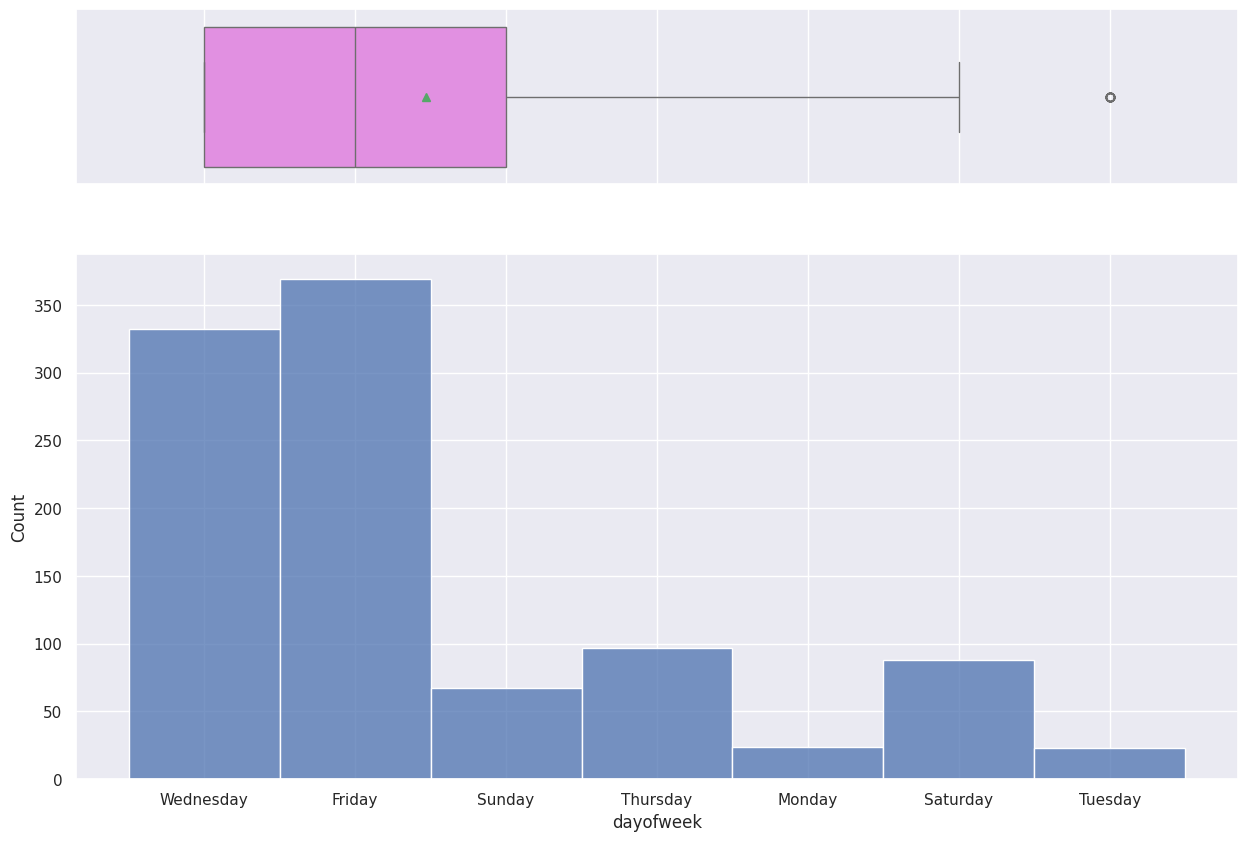

In [19]:
histogram_boxplot(df,"dayofweek")

TypeError: Could not convert string 'SpringFallFallFallWinterFallFallFallWinterSummerSpringWinterSpringWinterWinterFallFallSpringWinterSummerSpringFallSummerSummerFallWinterWinterWinterWinterSpringFallSpringSummerWinterFallSummerSpringSummerWinterSummerWinterFallWinterSpringWinterWinterWinterSpringSpringSpringFallFallSummerFallFallSpringWinterSummerSummerSummerSpringWinterSummerSpringSpringWinterWinterSummerWinterSpringSummerSummerWinterSummerFallFallWinterSpringSummerFallSpringWinterSummerWinterSummerSpringSpringSpringWinterFallFallSpringSpringWinterSpringWinterSummerWinterSummerSummerSpringFallSummerFallFallWinterSpringSpringSpringSpringFallSpringFallSpringWinterSummerFallFallWinterFallSummerSpringWinterSpringWinterWinterSummerSpringWinterSummerFallFallSpringWinterSpringFallSummerSummerFallSummerSummerSummerWinterWinterSpringSpringFallSummerSpringWinterWinterSpringSpringSummerFallSpringSpringSpringWinterSummerWinterFallFallFallFallSpringFallFallSpringWinterWinterWinterWinterWinterSummerWinterFallFallWinterWinterFallWinterWinterFallFallWinterFallSummerWinterSpringSummerSpringFallFallWinterFallSummerSpringWinterSummerWinterSummerSummerWinterFallFallSpringWinterSummerSpringWinterWinterSummerSummerWinterSpringFallWinterFallWinterFallWinterWinterSpringWinterSummerFallSummerSpringWinterSpringFallWinterSpringWinterFallSummerSummerSummerFallSummerFallSummerSummerWinterSpringSpringSummerSpringSummerSummerFallSummerWinterSpringWinterFallFallSpringWinterSummerWinterWinterSummerFallWinterSpringWinterFallWinterFallWinterSpringSummerWinterWinterWinterSummerSummerSpringSummerSpringWinterFallSummerWinterSummerFallWinterWinterSummerSpringWinterSpringFallFallFallFallSpringWinterSummerSummerFallWinterSpringWinterSpringFallFallFallSpringFallSpringFallFallFallWinterSpringSummerFallFallSummerSummerSummerWinterSpringWinterSpringWinterFallFallSummerFallWinterSpringFallSummerWinterFallFallFallFallWinterSpringSummerSummerWinterWinterFallSpringSummerSpringSummerWinterSpringSummerWinterSummerWinterFallWinterSummerWinterFallSummerFallSummerSummerSpringSummerSpringFallSummerWinterSummerSummerSummerSpringFallSummerFallSpringSummerSummerSpringSummerSummerWinterSpringSummerSpringSpringSummerSummerSpringSummerSpringSummerFallSpringFallSpringSummerFallWinterFallFallFallSpringWinterSummerFallFallSpringFallWinterFallFallSpringSpringSpringWinterSummerSpringWinterFallWinterWinterSummerSummerWinterWinterWinterWinterWinterSpringWinterSummerSummerWinterWinterSpringSummerFallFallFallFallFallSpringSummerFallFallFallFallWinterSummerWinterFallSpringFallWinterWinterSummerSummerFallFallWinterSummerSummerWinterFallWinterWinterSummerSpringSummerWinterSpringSpringSpringSpringFallFallSummerSummerWinterFallSummerSummerWinterSummerWinterSpringFallSpringSummerWinterSummerWinterWinterSpringSpringFallSummerWinterFallSpringSpringFallWinterSpringFallWinterWinterSummerFallWinterSpringSummerSummerSpringSummerWinterFallSpringWinterWinterSpringSpringSummerFallSummerSpringSummerFallWinterSpringWinterSummerSummerFallWinterSummerWinterSummerWinterSummerSpringFallSpringFallSummerSummerWinterFallSummerFallSpringWinterWinterSummerWinterSummerSummerSpringFallWinterWinterFallWinterWinterFallSpringSummerSummerSpringSpringSummerWinterSpringSummerWinterWinterFallWinterSummerSpringSpringSpringWinterFallSpringSummerSummerWinterSpringFallSpringSpringSummerWinterFallFallSpringSummerSummerWinterWinterSpringSpringSummerSummerFallFallSummerWinterSpringFallSpringFallFallFallSpringSummerSpringSummerSpringSummerSummerFallSummerSpringSpringFallSpringWinterWinterFallFallSummerSummerSpringWinterSpringWinterSummerSummerSpringWinterWinterSpringSpringFallSpringSummerSpringSpringFallSpringSpringFallSpringSummerFallSummerFallFallSpringSummerSummerFallSummerWinterWinterSpringFallSpringFallSummerSummerSummerWinterSpringSummerFallSpringSpringSummerSpringSummerWinterFallWinterWinterFallFallFallFallFallWinterFallWinterWinterSummerSpringFallSpringFallSpringWinterSummerSummerSpringSpringFallFallWinterWinterWinterSummerSummerSpringFallSummerSpringSummerFallWinterWinterWinterSummerSummerSummerWinterWinterWinterSpringSpringSpringSpringSpringSummerFallWinterSpringSpringFallSpringSummerFallSpringSpringSpringSpringFallSpringSpringWinterSpringFallWinterSpringWinterWinterSummerFallSummerSpringFallFallWinterSpringSpringSummerSpringFallWinterFallWinterSpringFallWinterWinterFallFallFallWinterWinterWinterSummerSpringSpringWinterWinterFallFallSpringSpringSpringFallSpringSpringFallSpringFallSpringFallSpringSummerSummerFallSummerFallSummerFallSummerFallSpringSpringSpringSpringFallSummerFallSummerFallFallFallWinterFallSpringSummerWinterSpringWinterSpringSpringSummerSummerSpringFallSpringFallFallFallFallFallSummerSpringFallFallWinterFallSummerSummerSpringSpringSummerSummerSummerSpringSummerWinterSpringWinterWinterWinterFallWinterFallWinterSummerSummerWinterFallSummerSpringFallSpringSpringSummerSpringSummerSummerSummerWinterWinterSummerSpringSummerSpringSummerSpringWinterFallFallFallWinterFallWinterFallWinterWinterWinterSpringSpringWinterSummerSummerFallFallWinterFallWinterSpringSpringSummerFallWinterSummerSpringSpringFallSummerSummerSummerSpringFallWinterWinterWinterSummerWinterSpringFallWinterSpringSummerSummerWinterFallWinterWinterSummerSpringSpringFallSpringWinterSpringFallSpringSummerFallSpringFallFallSummerSpringFallWinterFallFallSummerWinterFallSpringFallWinterSummerWinterWinterSummerWinterSpringSummerWinterSpringWinterWinterWinterSpringWinterFallSummerFallSpringSummerWinterSummerWinterWinterSummerWinterSummerFallSummerFallSummerSummer' to numeric

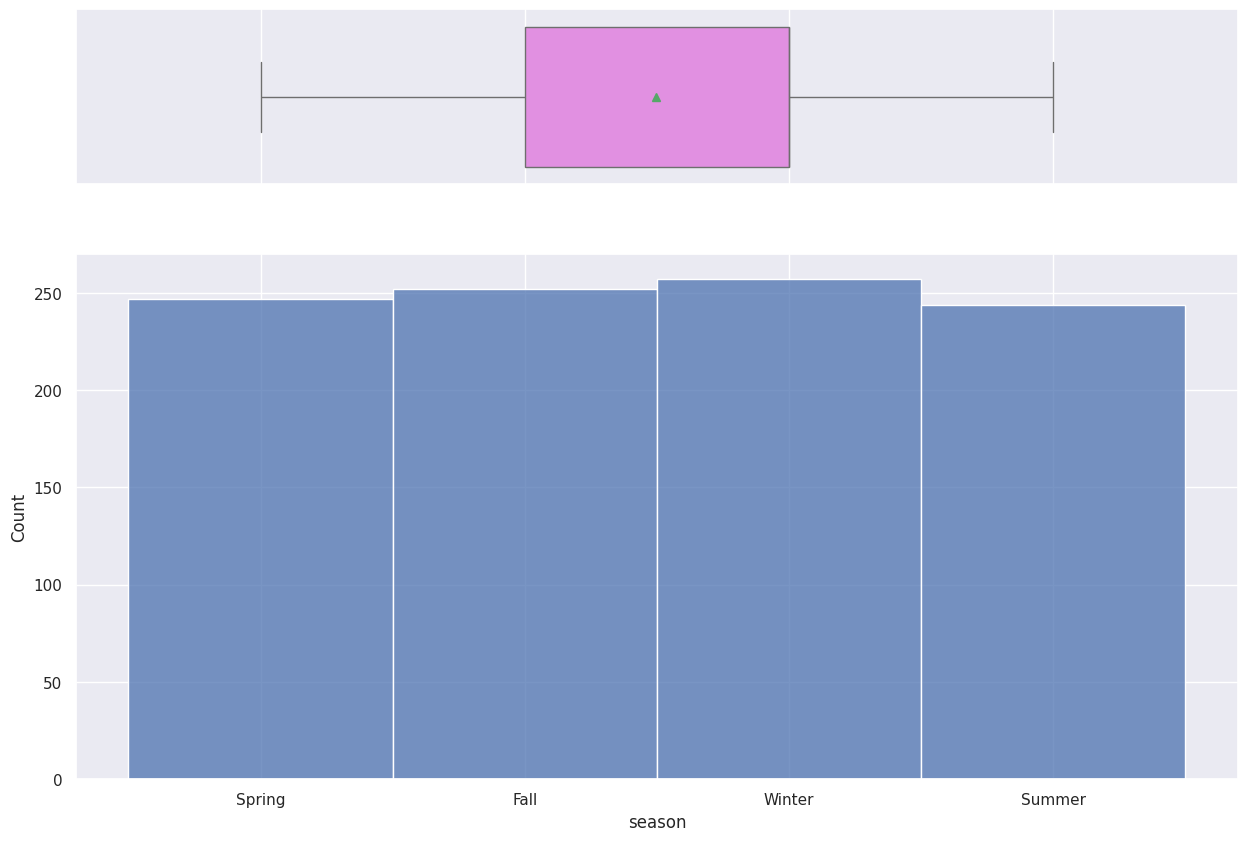

In [20]:
histogram_boxplot(df,"season")

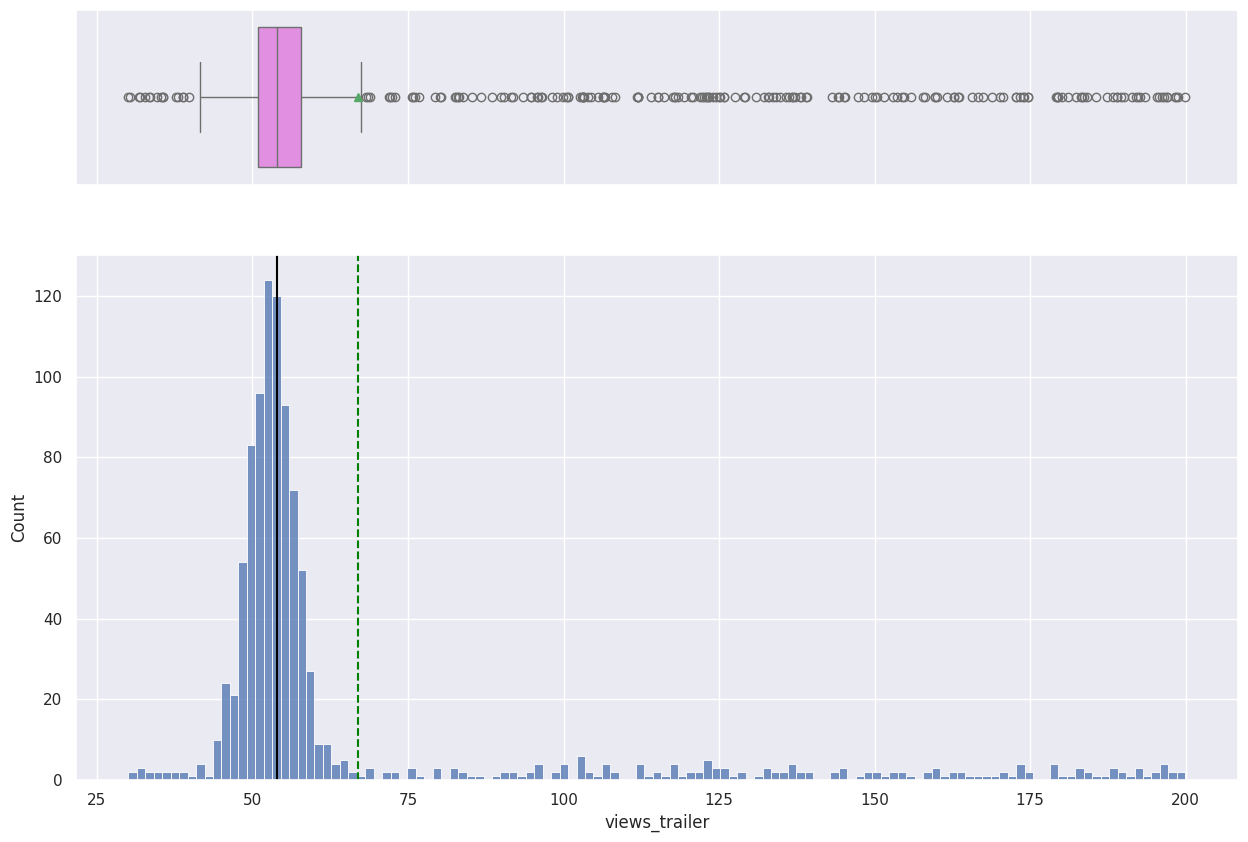

In [21]:
histogram_boxplot(df,"views_trailer")

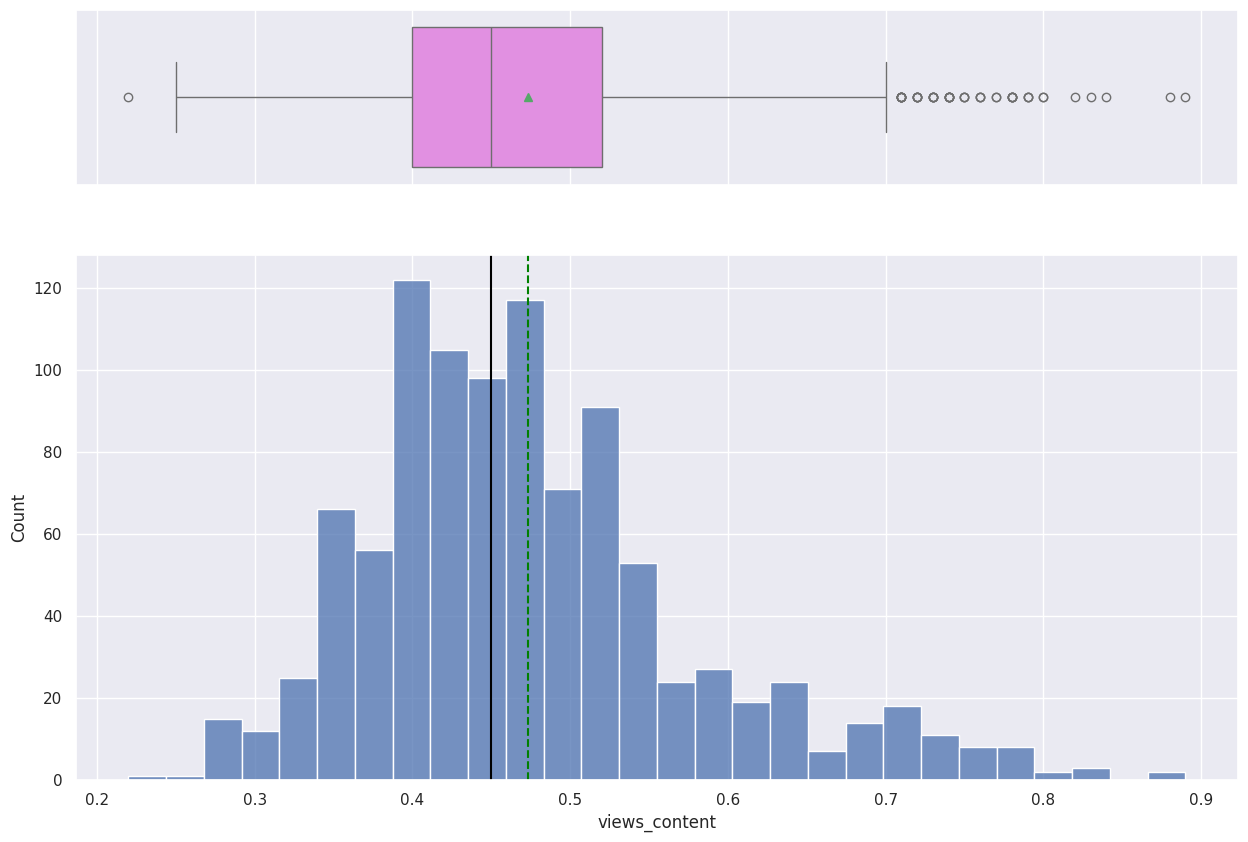

In [22]:
histogram_boxplot(df,"views_content")

**Bivariate analysis**

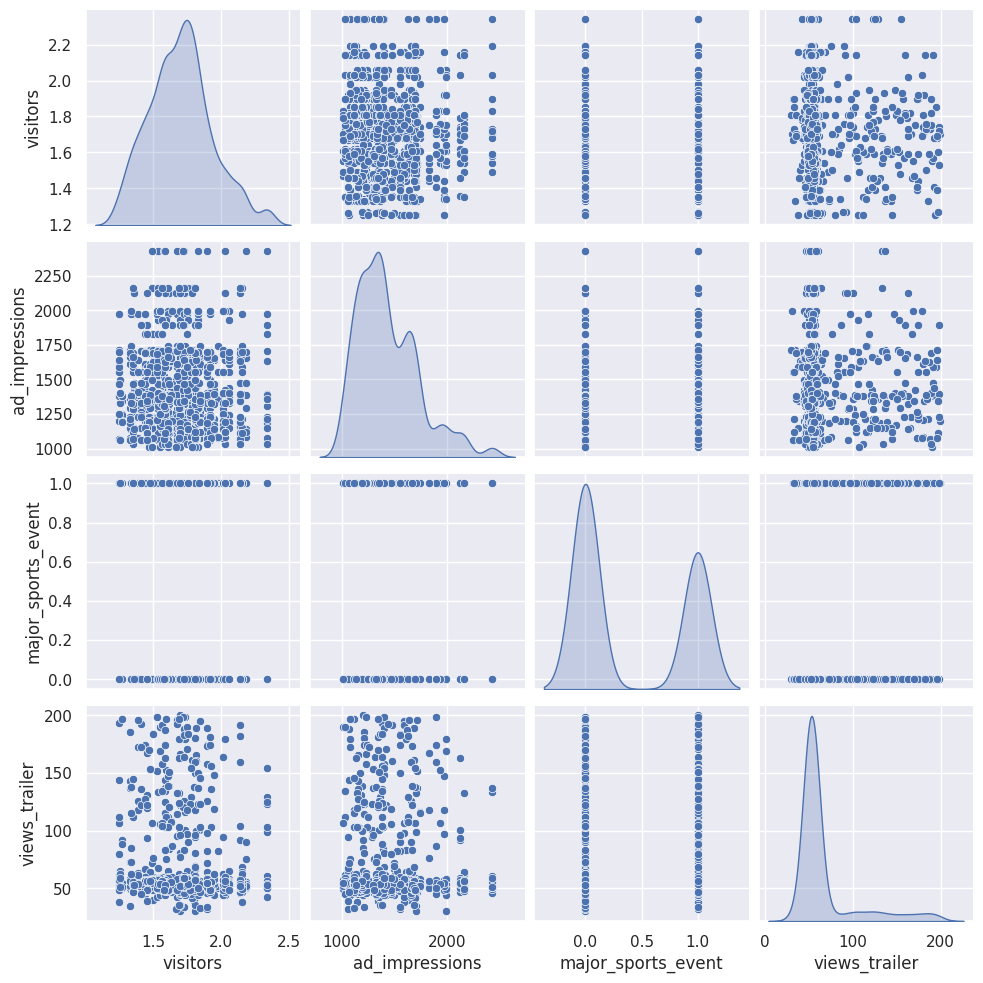

In [23]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(
    df_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

In [24]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

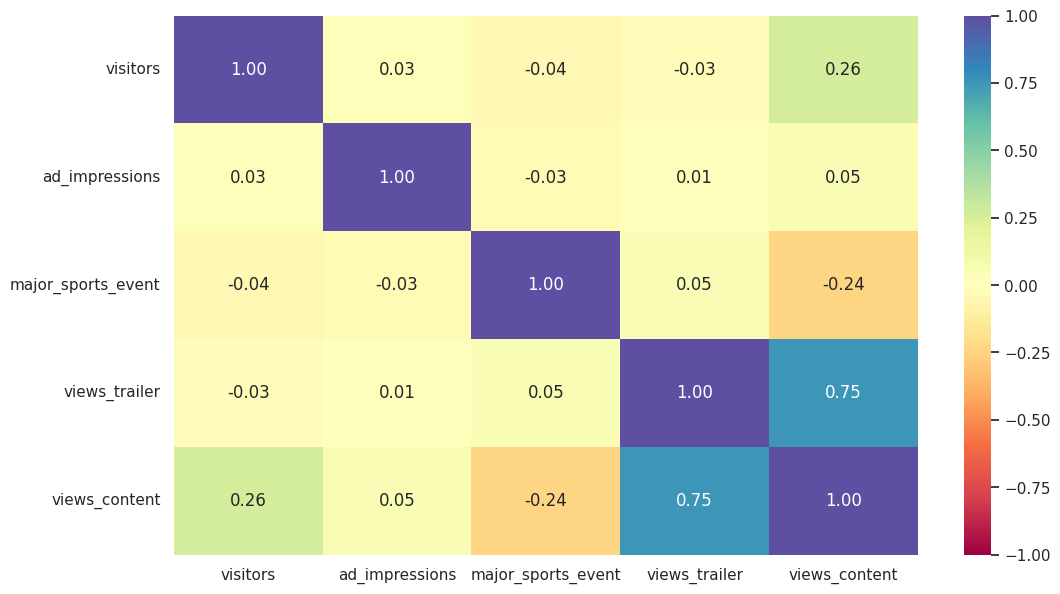

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

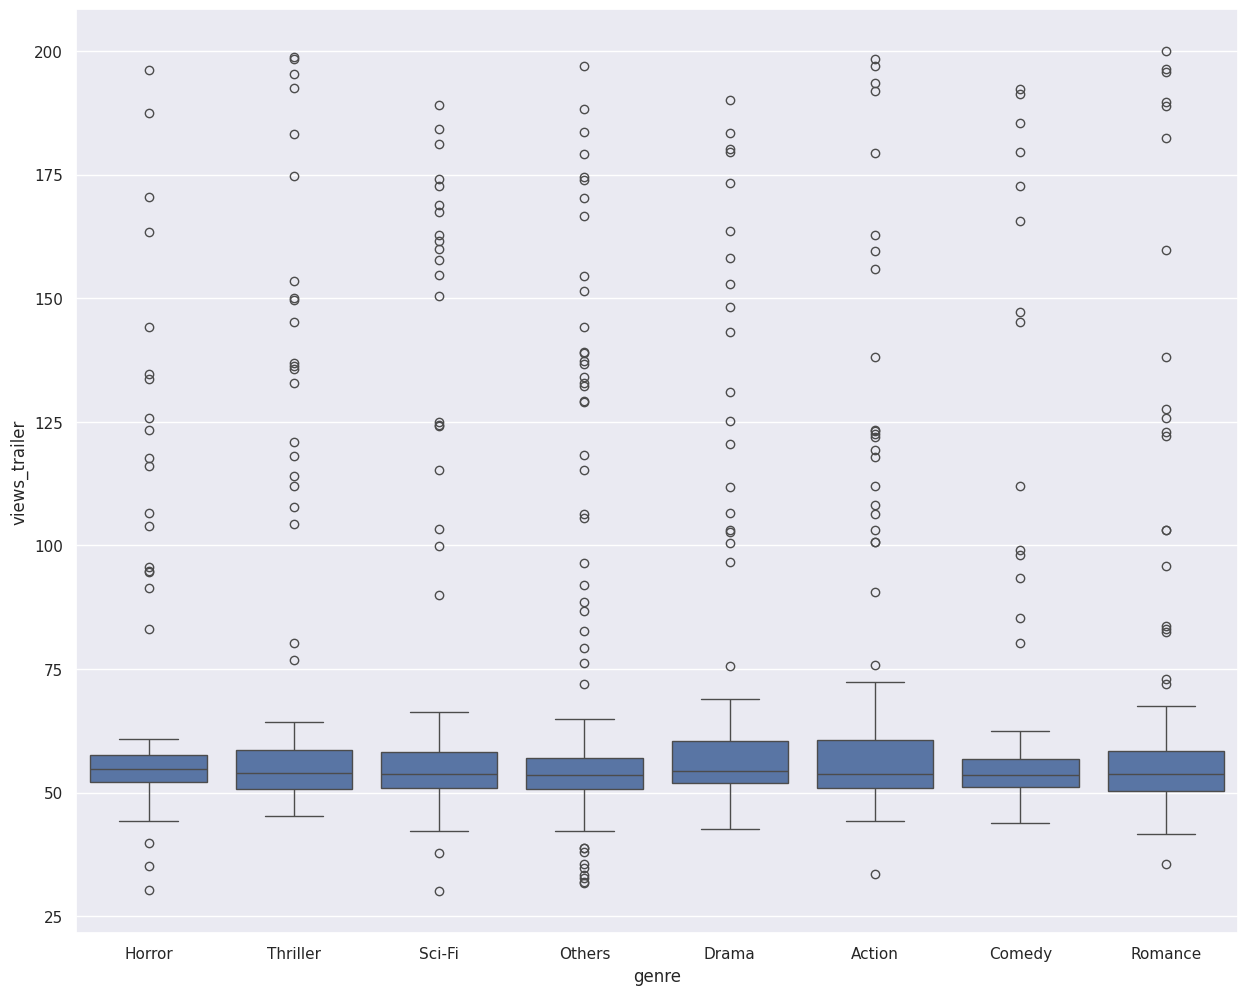

In [26]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x="genre", y="views_trailer")
plt.show()

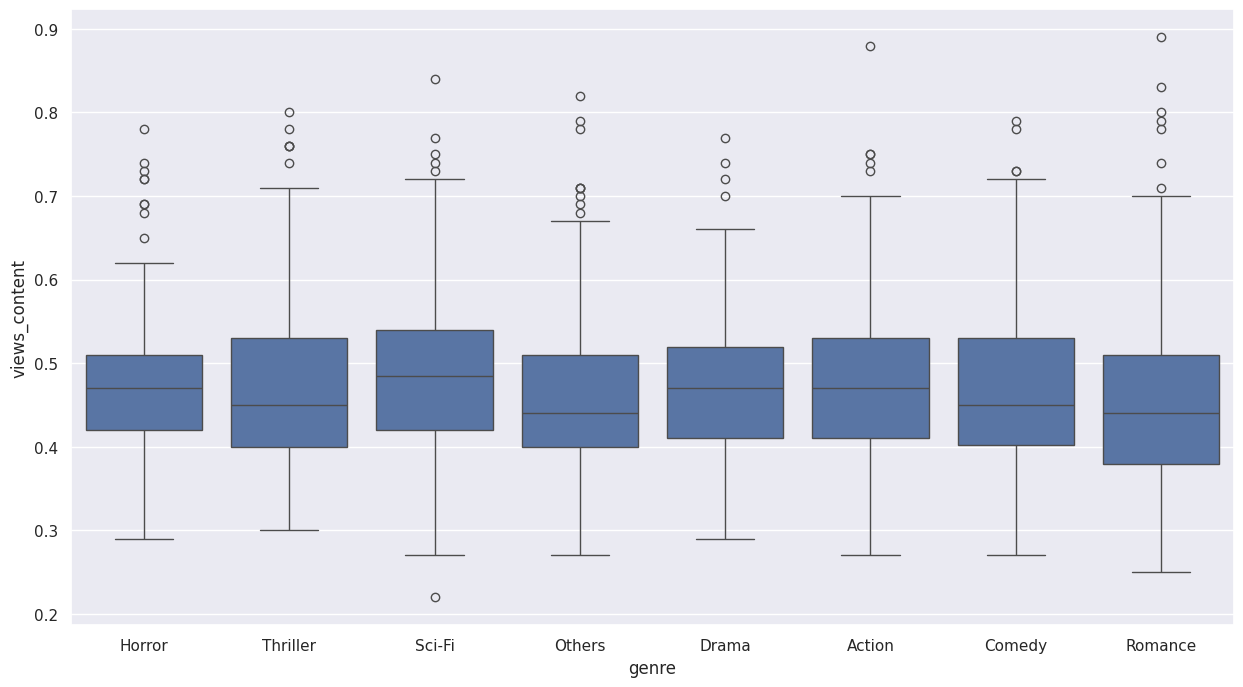

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="genre", y="views_content")
plt.show()

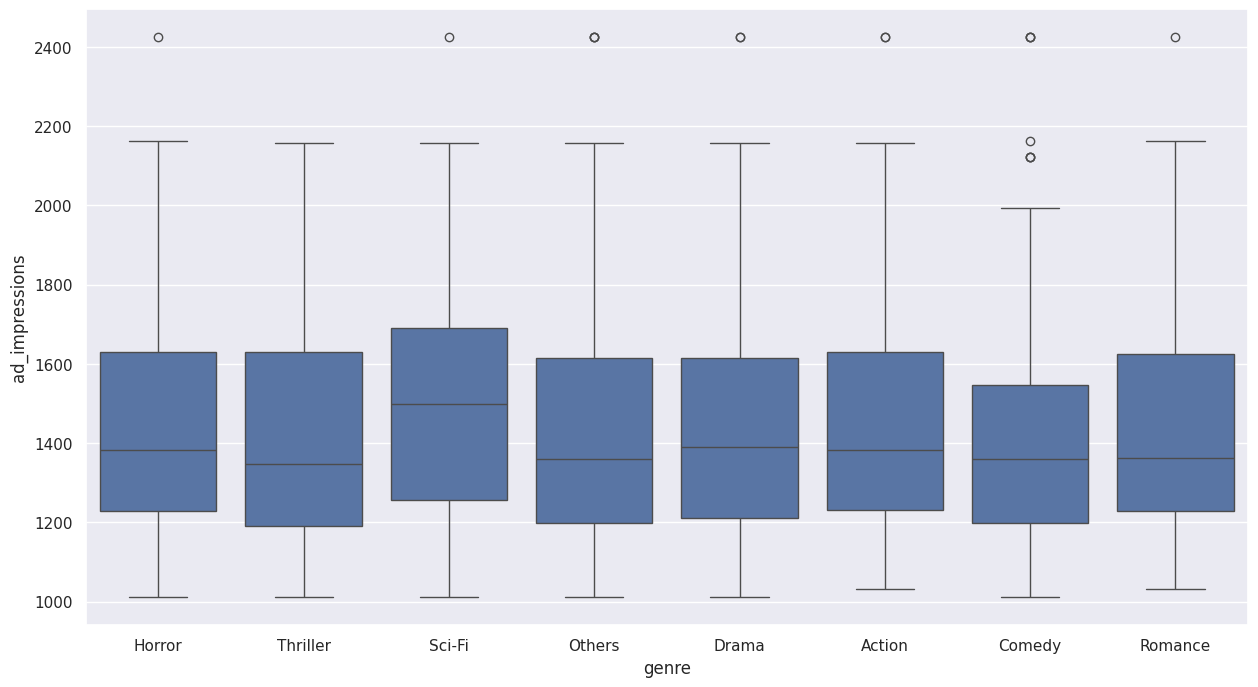

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="genre", y="ad_impressions")
plt.show()

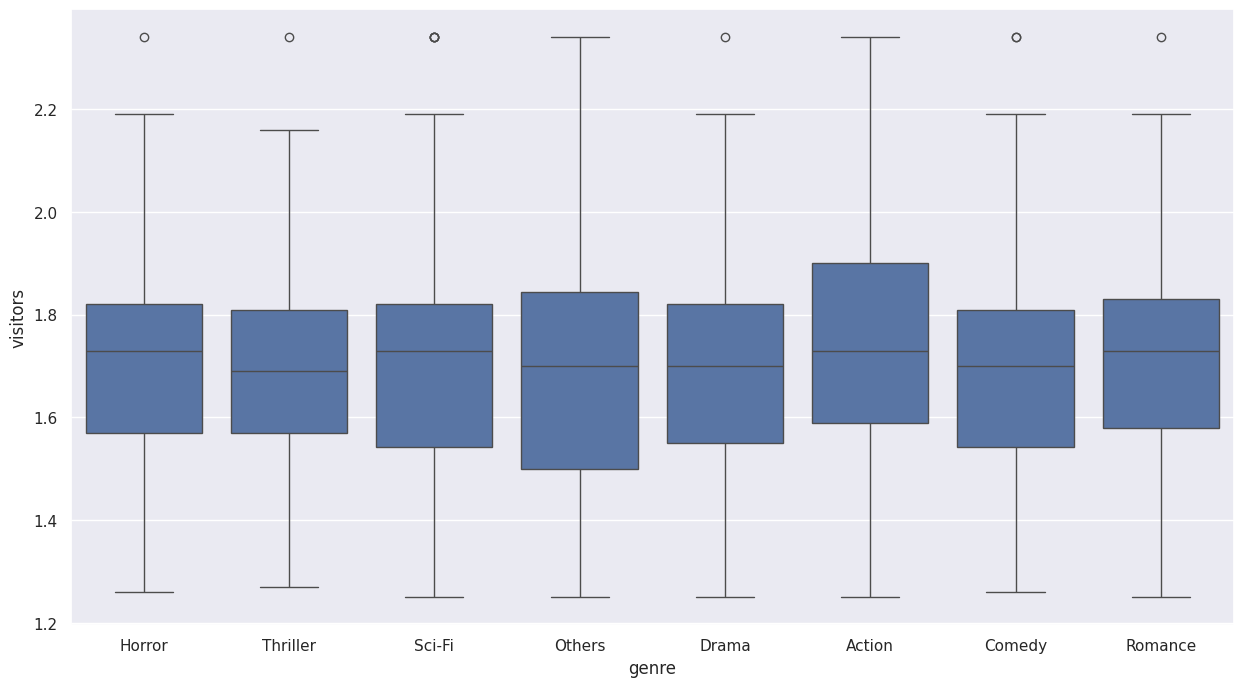

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="genre", y="visitors")
plt.show()

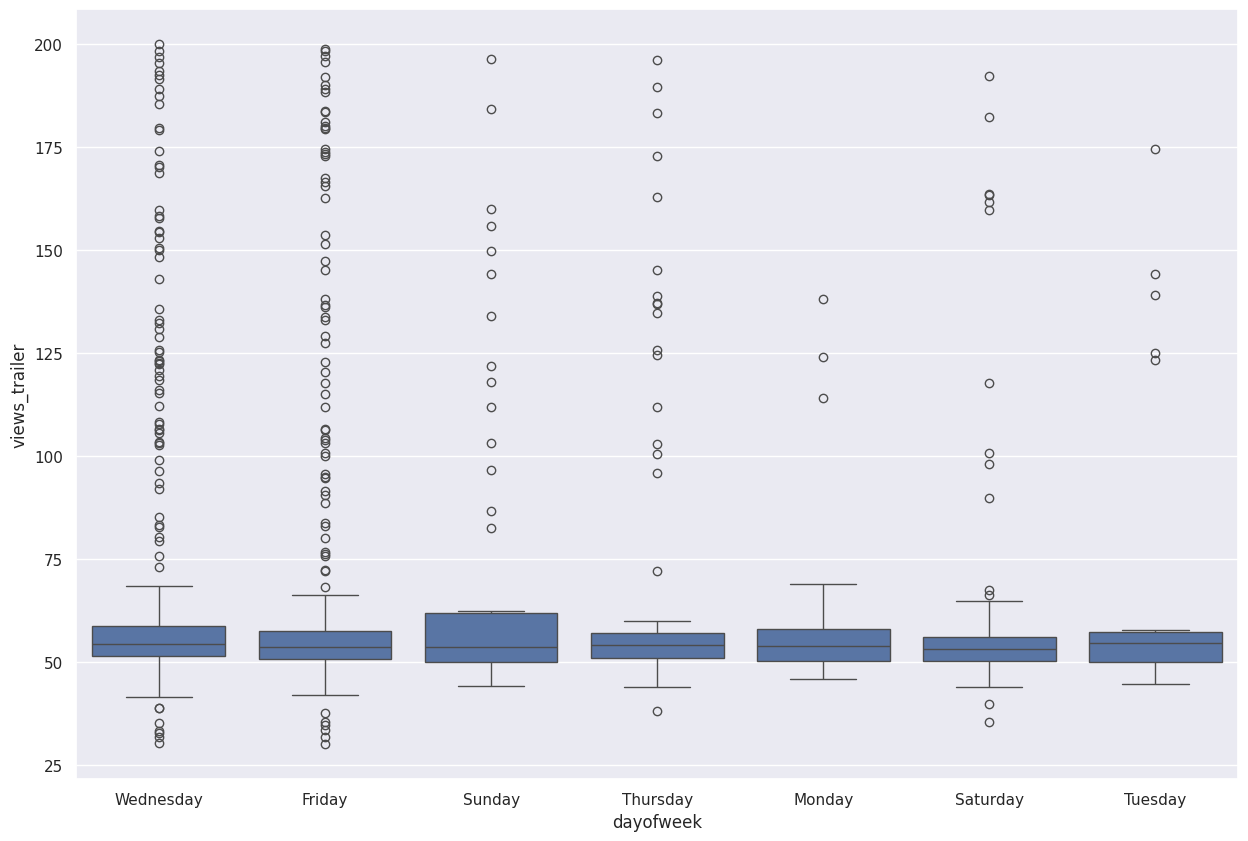

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="dayofweek", y="views_trailer")
plt.show()

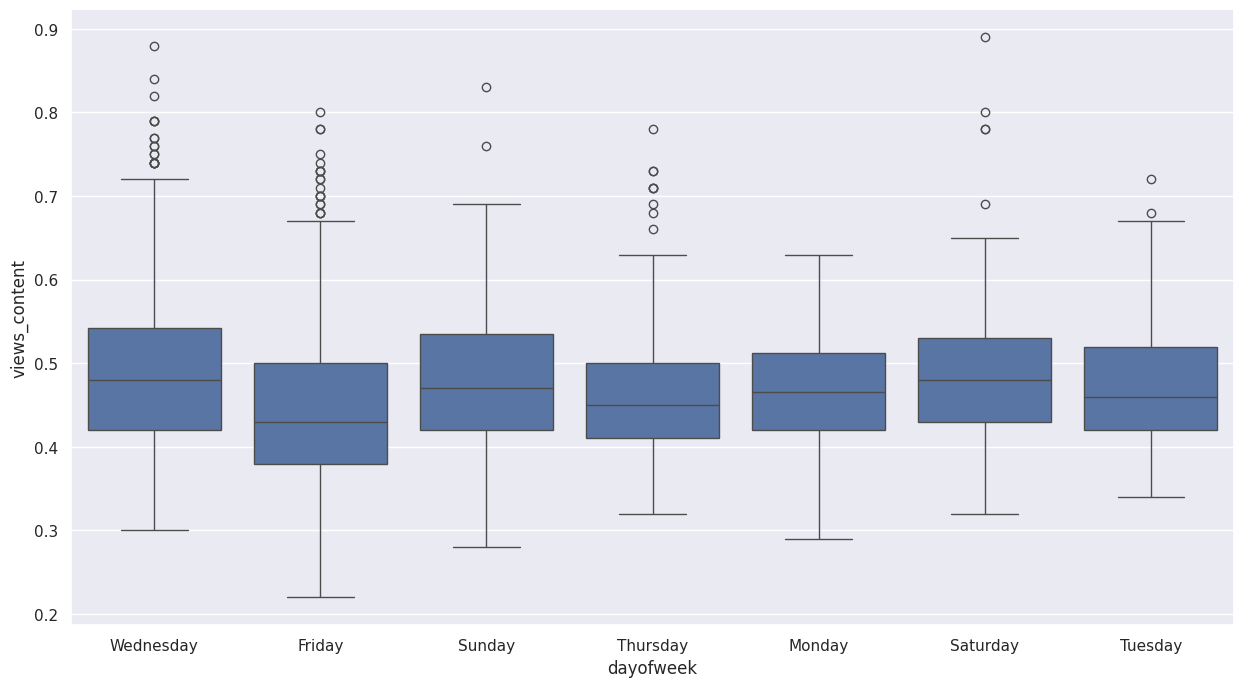

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="dayofweek", y="views_content")
plt.show()

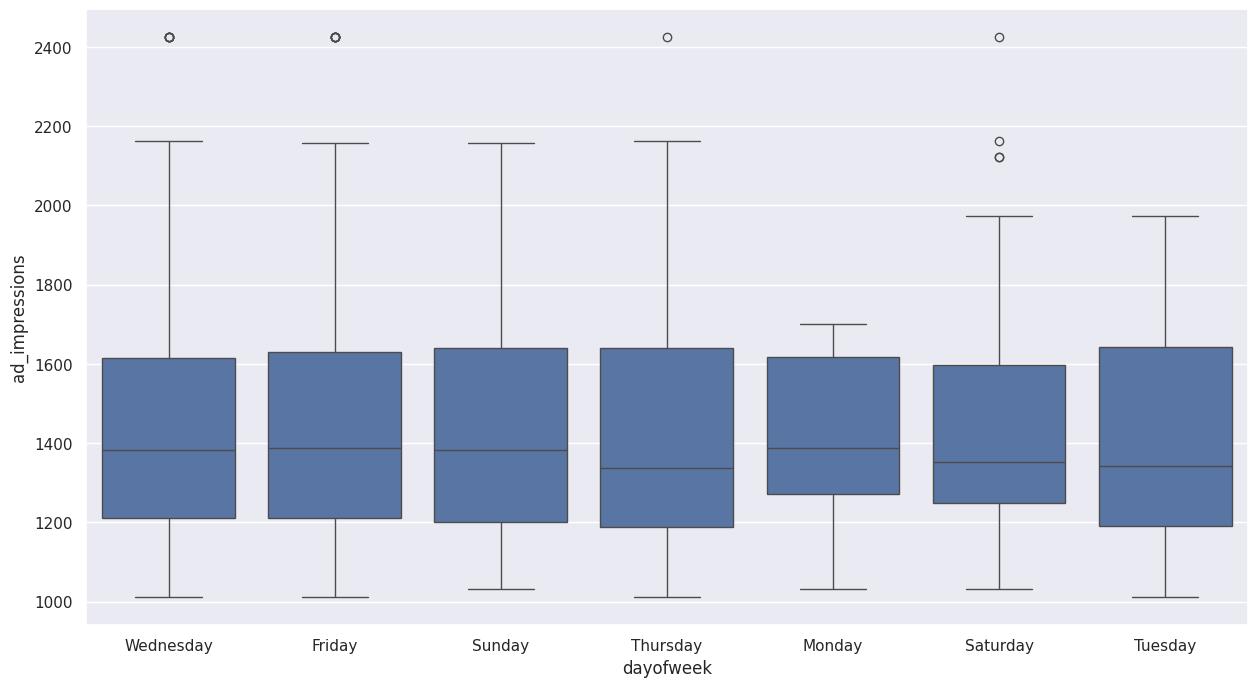

In [32]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="dayofweek", y="ad_impressions")
plt.show()

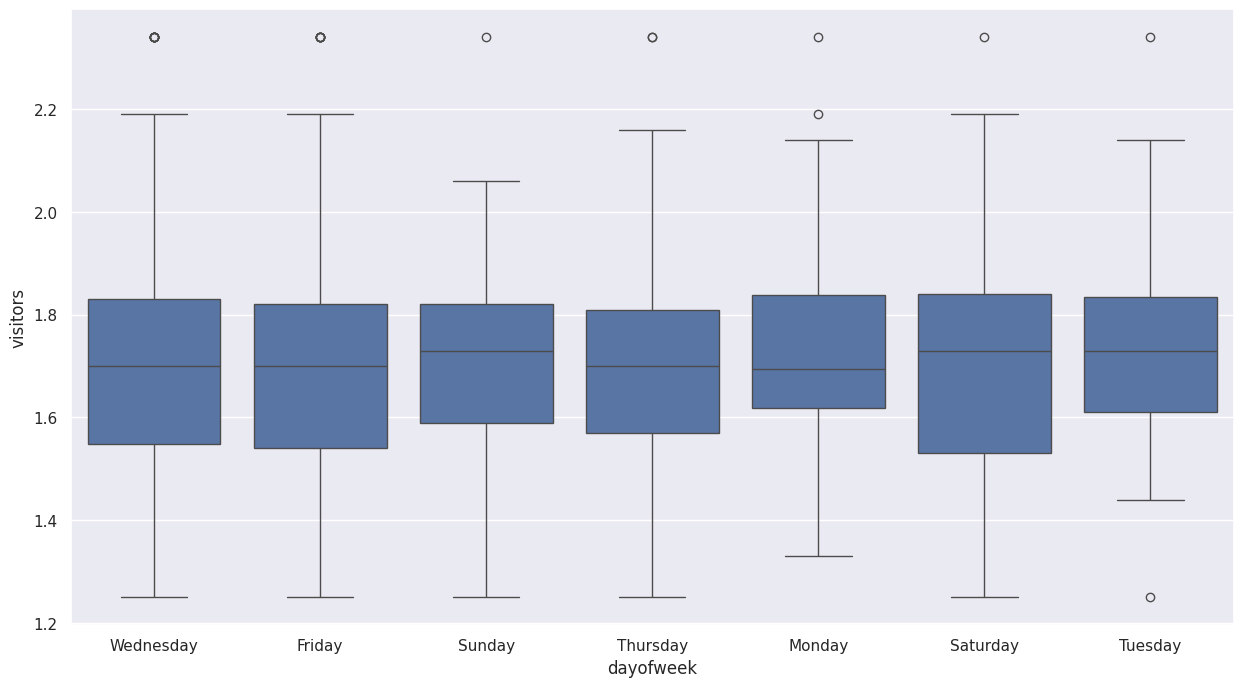

In [33]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="dayofweek", y="visitors")
plt.show()

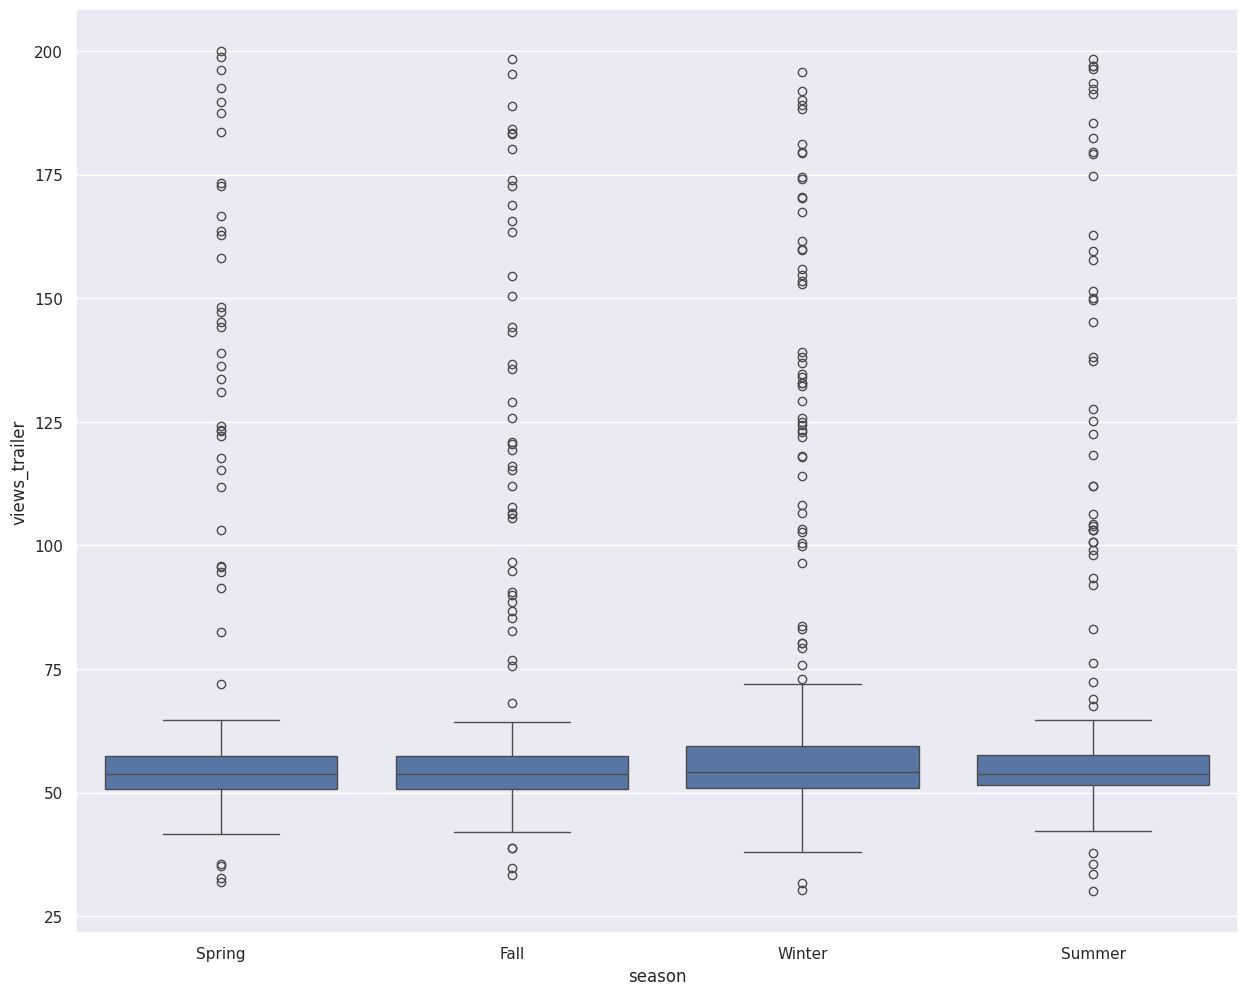

In [34]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x="season", y="views_trailer")
plt.show()

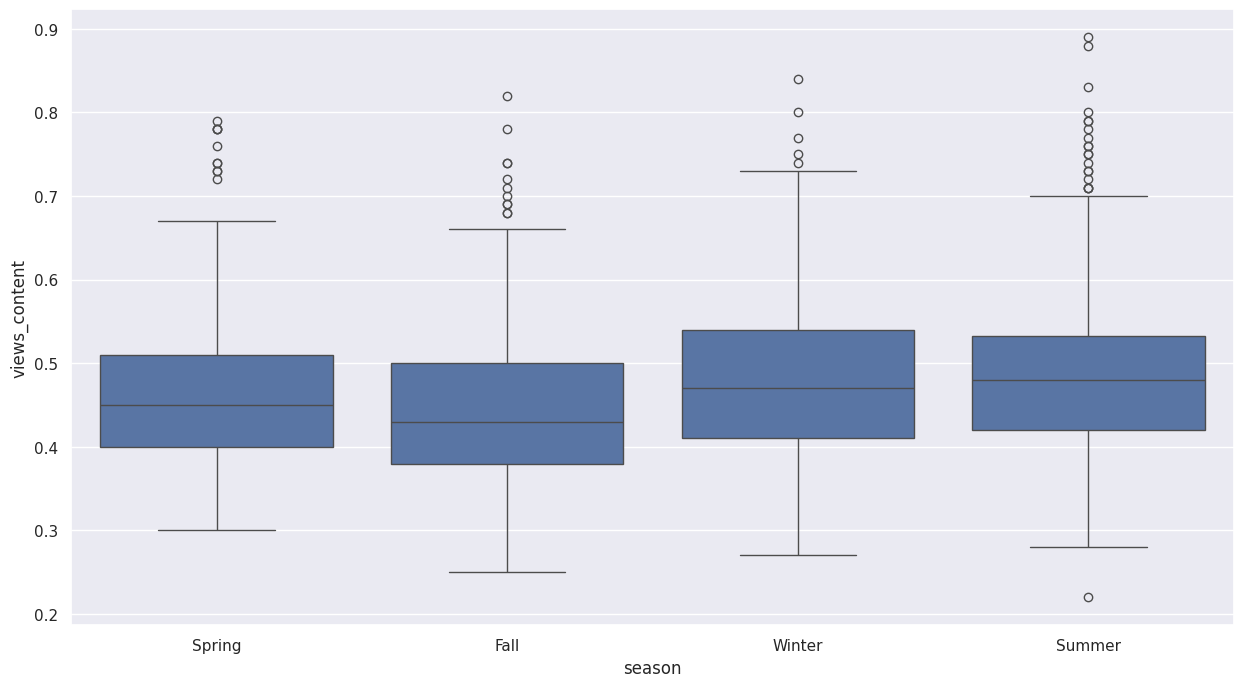

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

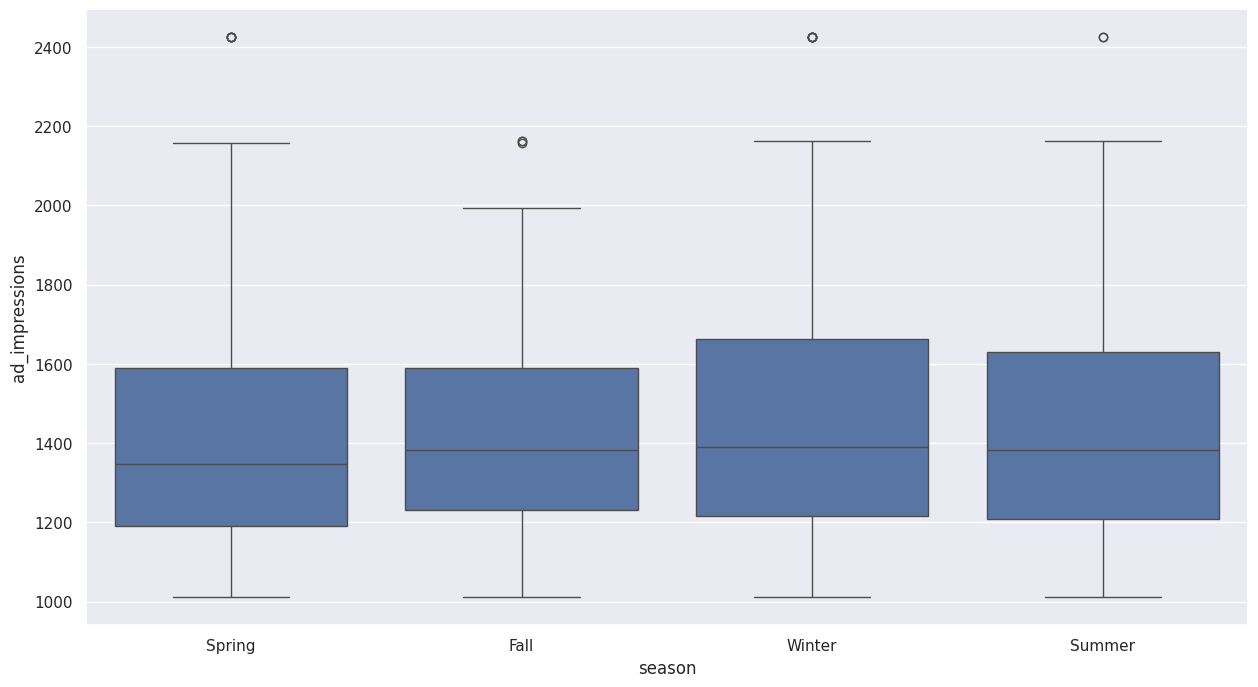

In [36]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="season", y="ad_impressions")
plt.show()

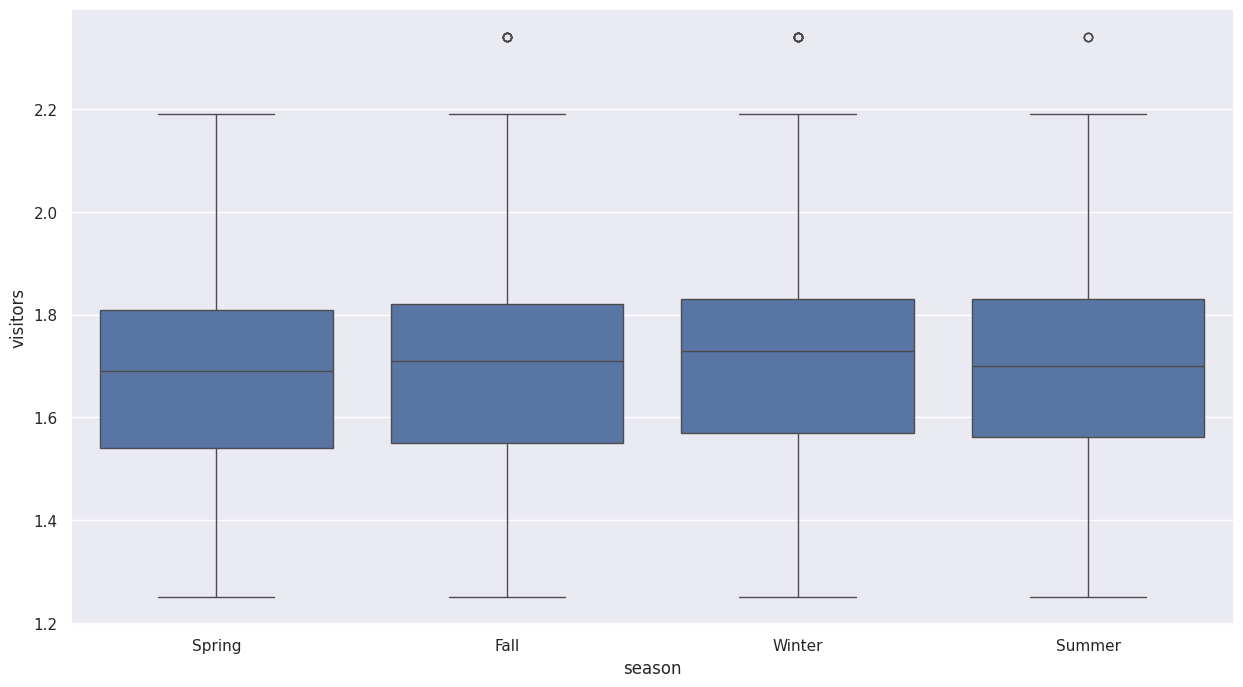

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="season", y="visitors")
plt.show()

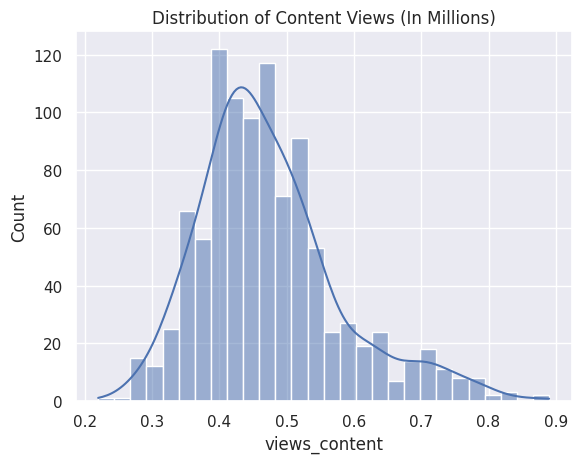

In [38]:
sns.histplot(data=df, x="views_content", kde=True)
plt.title("Distribution of Content Views (In Millions)")
plt.show()

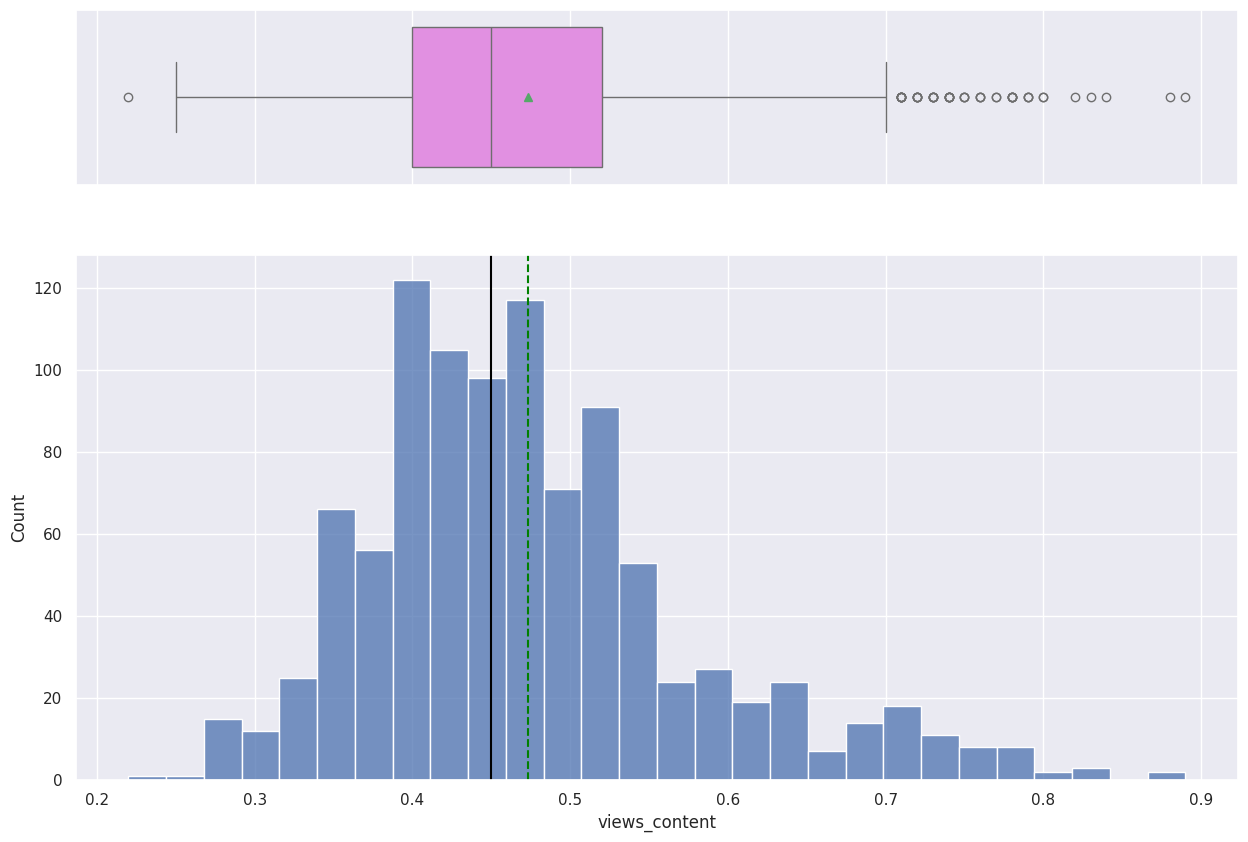

In [39]:
histogram_boxplot(df, "views_content")

TypeError: Could not convert string 'HorrorThrillerThrillerSci-FiSci-FiThrillerOthersHorrorDramaActionDramaSci-FiOthersDramaOthersHorrorThrillerSci-FiSci-FiComedyOthersThrillerComedySci-FiHorrorSci-FiOthersSci-FiOthersOthersSci-FiOthersActionHorrorOthersActionThrillerComedyDramaComedySci-FiRomanceRomanceDramaRomanceDramaOthersHorrorHorrorOthersOthersDramaActionHorrorHorrorRomanceThrillerActionActionActionRomanceSci-FiActionThrillerOthersThrillerSci-FiComedyOthersRomanceComedyDramaRomanceComedyOthersSci-FiThrillerOthersActionHorrorSci-FiHorrorActionHorrorActionDramaSci-FiSci-FiDramaDramaRomanceOthersHorrorSci-FiOthersOthersComedyRomanceActionActionOthersOthersDramaOthersDramaRomanceHorrorOthersOthersDramaOthersRomanceThrillerOthersThrillerActionOthersOthersDramaHorrorComedyOthersThrillerOthersSci-FiOthersComedyRomanceSci-FiComedyOthersThrillerOthersOthersComedyHorrorActionComedyHorrorActionActionActionDramaThrillerSci-FiDramaOthersComedyDramaRomanceThrillerThrillerHorrorHorrorOthersOthersOthersOthersSci-FiActionSci-FiSci-FiHorrorSci-FiRomanceOthersHorrorHorrorRomanceDramaRomanceDramaSci-FiHorrorComedyThrillerOthersRomanceSci-FiOthersDramaRomanceSci-FiHorrorRomanceHorrorOthersComedyRomanceRomanceRomanceOthersHorrorOthersSci-FiDramaComedyOthersThrillerComedyRomanceActionActionThrillerDramaDramaThrillerOthersComedyOthersSci-FiSci-FiActionComedyDramaOthersRomanceOthersThrillerSci-FiThrillerDramaDramaDramaSci-FiDramaActionThrillerActionHorrorOthersOthersHorrorHorrorActionHorrorHorrorActionActionDramaOthersComedyThrillerActionComedyRomanceHorrorDramaComedyDramaActionActionDramaActionDramaRomanceOthersThrillerHorrorOthersOthersDramaActionOthersOthersActionOthersRomanceOthersDramaRomanceSci-FiDramaOthersSci-FiComedyRomanceDramaRomanceActionComedyThrillerActionRomanceSci-FiHorrorDramaDramaComedyOthersRomanceOthersDramaOthersOthersOthersSci-FiOthersSci-FiThrillerDramaOthersActionComedyThrillerSci-FiThrillerOthersOthersOthersSci-FiHorrorOthersHorrorThrillerHorrorHorrorThrillerSci-FiThrillerDramaOthersThrillerComedyActionComedyDramaThrillerOthersHorrorRomanceOthersRomanceComedyOthersDramaHorrorHorrorActionDramaThrillerHorrorOthersHorrorSci-FiRomanceComedyComedyHorrorRomanceHorrorOthersActionOthersComedyDramaOthersActionDramaComedyDramaSci-FiRomanceComedyRomanceHorrorOthersComedySci-FiComedyActionHorrorComedyOthersThrillerComedySci-FiComedyComedyActionOthersOthersActionOthersThrillerDramaComedyOthersDramaDramaSci-FiSci-FiComedyComedyThrillerComedyActionHorrorComedyHorrorActionOthersSci-FiHorrorOthersActionRomanceSci-FiHorrorHorrorOthersOthersRomanceActionRomanceOthersOthersThrillerDramaHorrorThrillerThrillerOthersSci-FiHorrorActionThrillerHorrorOthersThrillerRomanceActionActionSci-FiDramaDramaRomanceRomanceSci-FiDramaActionComedyRomanceOthersHorrorDramaHorrorThrillerThrillerThrillerHorrorHorrorComedyThrillerThrillerOthersSci-FiSci-FiRomanceComedyDramaOthersOthersOthersRomanceRomanceActionComedyHorrorHorrorRomanceComedyComedyRomanceSci-FiSci-FiRomanceActionOthersActionRomanceOthersOthersOthersOthersOthersHorrorActionActionRomanceHorrorActionActionRomanceComedyThrillerOthersHorrorOthersActionRomanceComedySci-FiRomanceOthersOthersThrillerComedyRomanceThrillerOthersOthersOthersOthersDramaRomanceActionThrillerRomanceOthersDramaComedyOthersSci-FiActionRomanceThrillerOthersRomanceSci-FiOthersOthersComedyOthersActionOthersActionHorrorDramaOthersSci-FiComedyActionOthersSci-FiComedyDramaDramaSci-FiComedyOthersSci-FiHorrorHorrorComedyComedySci-FiThrillerActionOthersOthersRomanceDramaActionRomanceComedyComedyOthersOthersDramaSci-FiThrillerDramaRomanceHorrorOthersComedyComedyOthersOthersActionRomanceOthersComedySci-FiRomanceOthersDramaActionOthersOthersOthersRomanceHorrorThrillerActionComedyDramaOthersOthersOthersOthersComedyDramaThrillerHorrorOthersActionComedyDramaDramaThrillerOthersComedyComedyOthersHorrorComedyDramaOthersThrillerThrillerThrillerThrillerSci-FiOthersActionOthersComedyOthersComedyActionSci-FiActionOthersOthersSci-FiThrillerSci-FiDramaOthersOthersDramaActionOthersSci-FiOthersRomanceDramaActionOthersRomanceSci-FiOthersOthersThrillerOthersComedyOthersOthersSci-FiOthersOthersHorrorOthersComedyThrillerComedyThrillerThrillerOthersComedyDramaThrillerComedyRomanceRomanceOthersHorrorOthersThrillerComedyActionComedyRomanceOthersComedyThrillerOthersOthersActionOthersActionSci-FiThrillerDramaDramaOthersHorrorHorrorThrillerOthersDramaHorrorDramaRomanceComedyOthersThrillerOthersHorrorOthersSci-FiThrillerComedyComedyThrillerOthersOthersThrillerRomanceSci-FiRomanceComedyComedyOthersHorrorComedyOthersComedyHorrorDramaDramaRomanceComedyComedyComedySci-FiDramaRomanceOthersOthersOthersOthersOthersComedyThrillerRomanceOthersOthersThrillerOthersDramaThrillerOthersOthersOthersOthersHorrorOthersOthersRomanceOthersSci-FiDramaOthersSci-FiSci-FiComedyThrillerDramaOthersHorrorThrillerRomanceOthersOthersDramaOthersThrillerDramaThrillerRomanceOthersThrillerRomanceDramaThrillerHorrorThrillerDramaRomanceRomanceDramaOthersOthersSci-FiRomanceSci-FiThrillerOthersOthersOthersOthersHorrorOthersOthersThrillerOthersHorrorOthersHorrorOthersActionDramaThrillerComedySci-FiActionHorrorComedyThrillerOthersOthersOthersOthersThrillerActionHorrorDramaThrillerHorrorThrillerSci-FiHorrorOthersComedyRomanceOthersRomanceOthersOthersDramaActionOthersThrillerOthersHorrorThrillerHorrorThrillerThrillerActionOthersThrillerHorrorRomanceSci-FiActionActionOthersOthersComedyComedyActionOthersDramaSci-FiOthersRomanceDramaRomanceThrillerRomanceHorrorSci-FiComedyActionSci-FiThrillerComedyOthersSci-FiOthersOthersActionOthersActionComedyActionSci-FiRomanceComedyOthersDramaOthersActionOthersRomanceOthersThrillerThrillerDramaThrillerDramaThrillerSci-FiSci-FiDramaOthersOthersDramaComedyComedyHorrorThrillerRomanceThrillerSci-FiOthersOthersComedyHorrorRomanceActionOthersOthersHorrorActionComedyActionOthersSci-FiRomanceSci-FiRomanceActionRomanceOthersHorrorRomanceOthersDramaActionDramaHorrorRomanceDramaComedyOthersActionThrillerOthersSci-FiOthersSci-FiOthersDramaHorrorOthersHorrorOthersThrillerOthersComedyOthersThrillerSci-FiThrillerSci-FiActionSci-FiHorrorOthersOthersDramaActionDramaSci-FiComedyDramaOthersComedyRomanceOthersRomanceSci-FiRomanceOthersDramaThrillerComedyThrillerOthersActionRomanceActionSci-FiRomanceComedy' to numeric

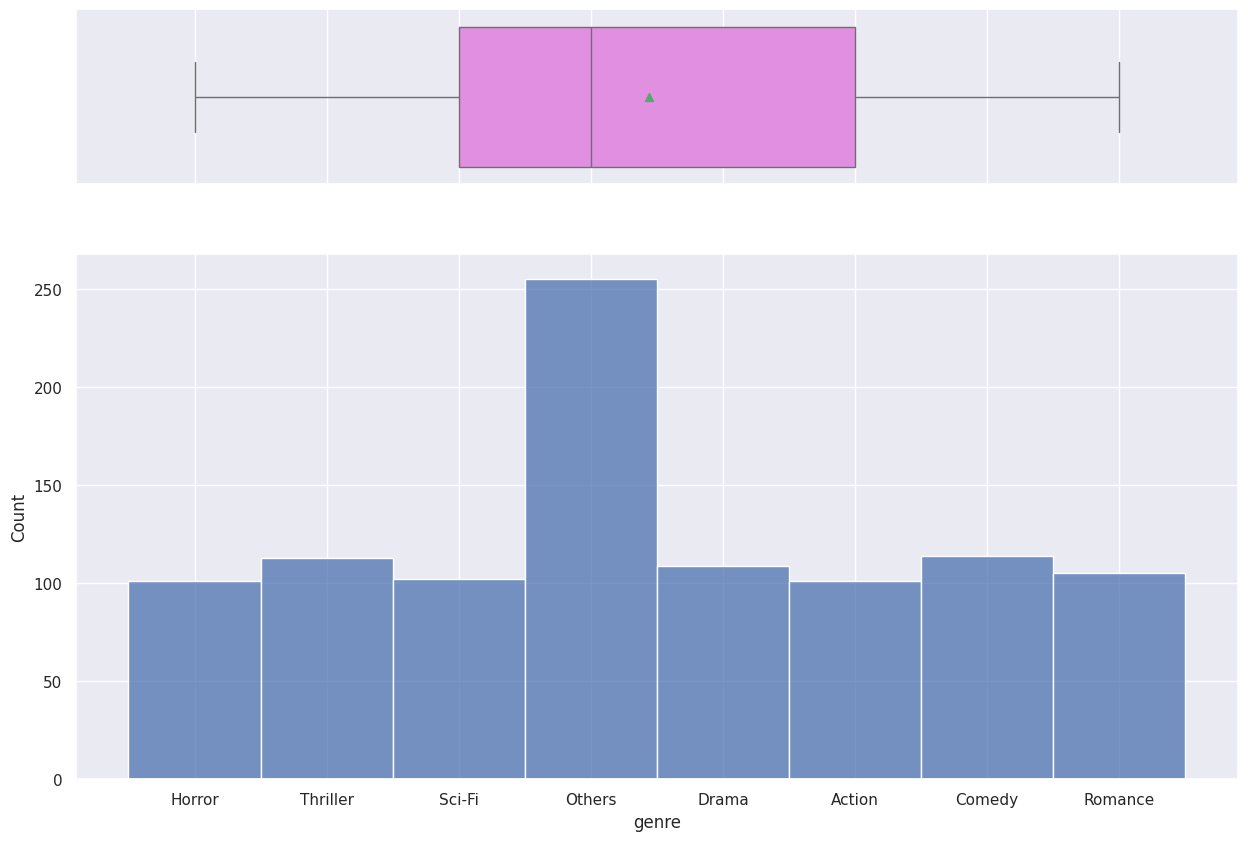

In [40]:
histogram_boxplot(df, "genre")

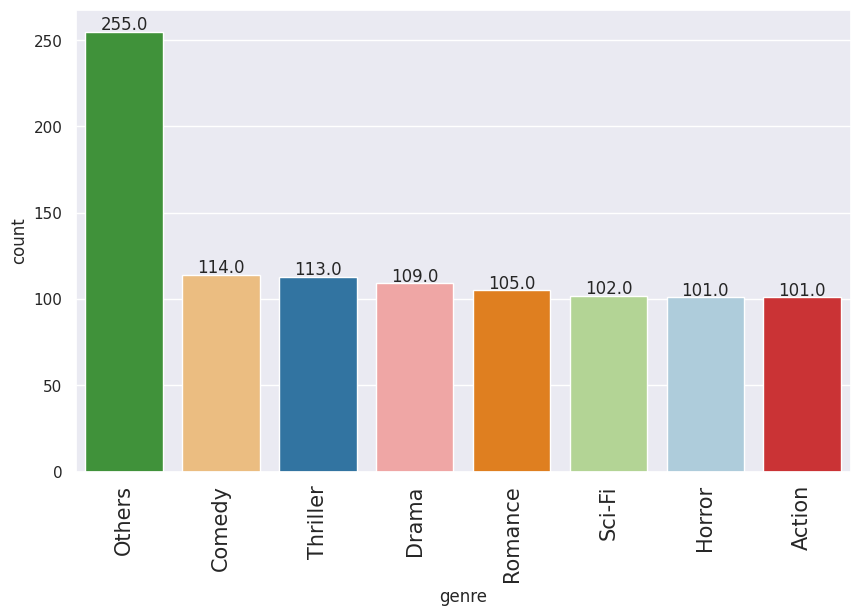

In [41]:
labeled_barplot(df, "genre")

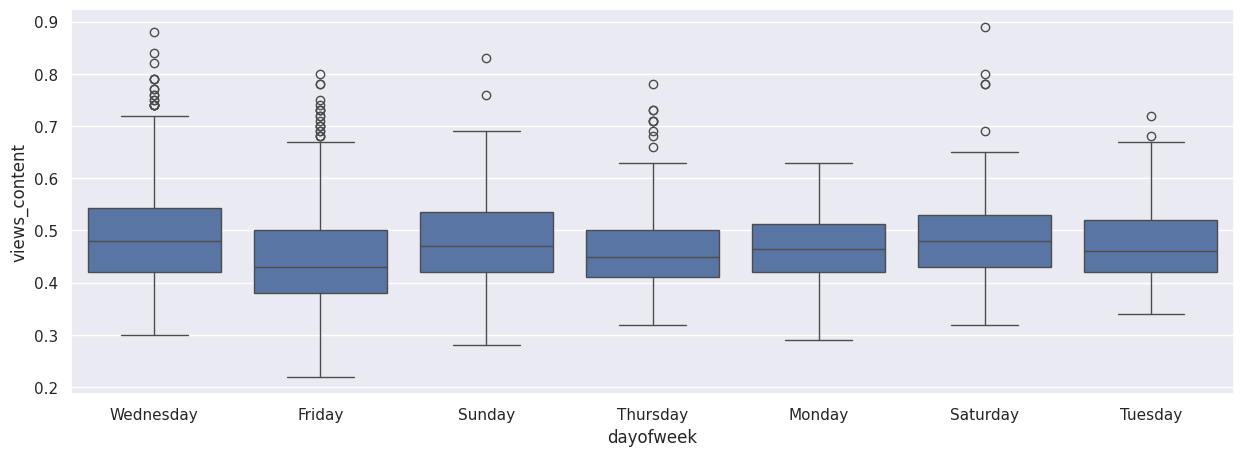

In [42]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content")
plt.show()

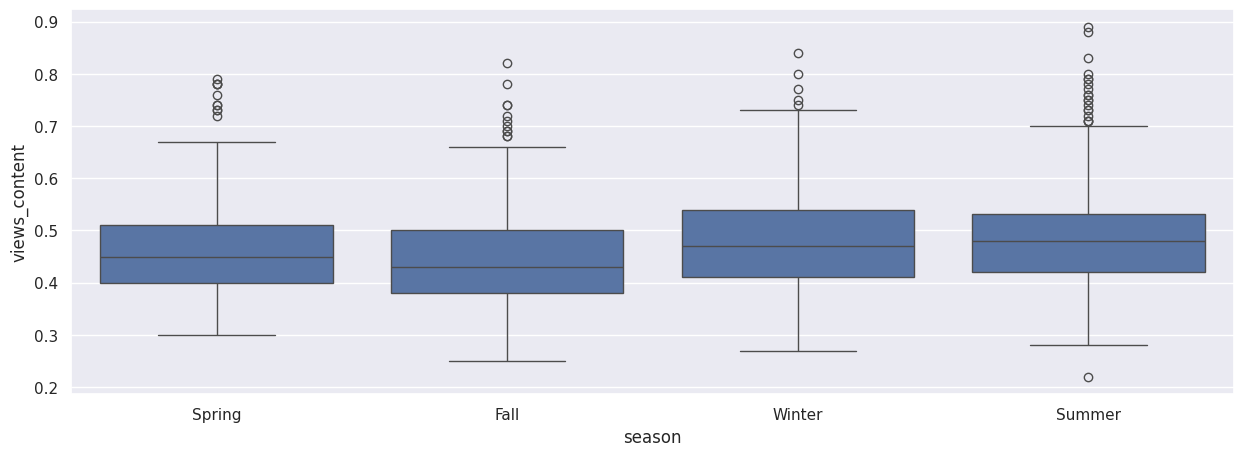

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

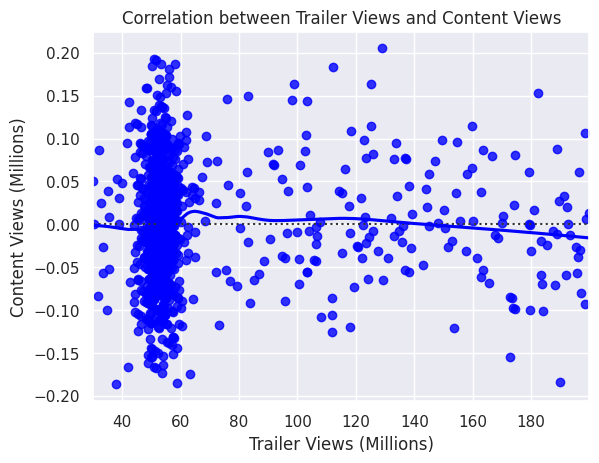

In [44]:
sns.residplot(
    data=df, x="views_trailer", y="views_content", color="Blue", lowess=True
)
plt.xlabel("Trailer Views (Millions)")
plt.ylabel("Content Views (Millions)")
plt.title("Correlation between Trailer Views and Content Views")
plt.show()

In [45]:
df1 = df.copy()

**Feature Engineering**

In [46]:
df1["Views_Difference"] = df1["views_trailer"] - df1["views_content"]
df1.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,Views_Difference
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,56.19
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,52.37
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,48.35
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,49.37
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,55.37


**Outlier Detection**

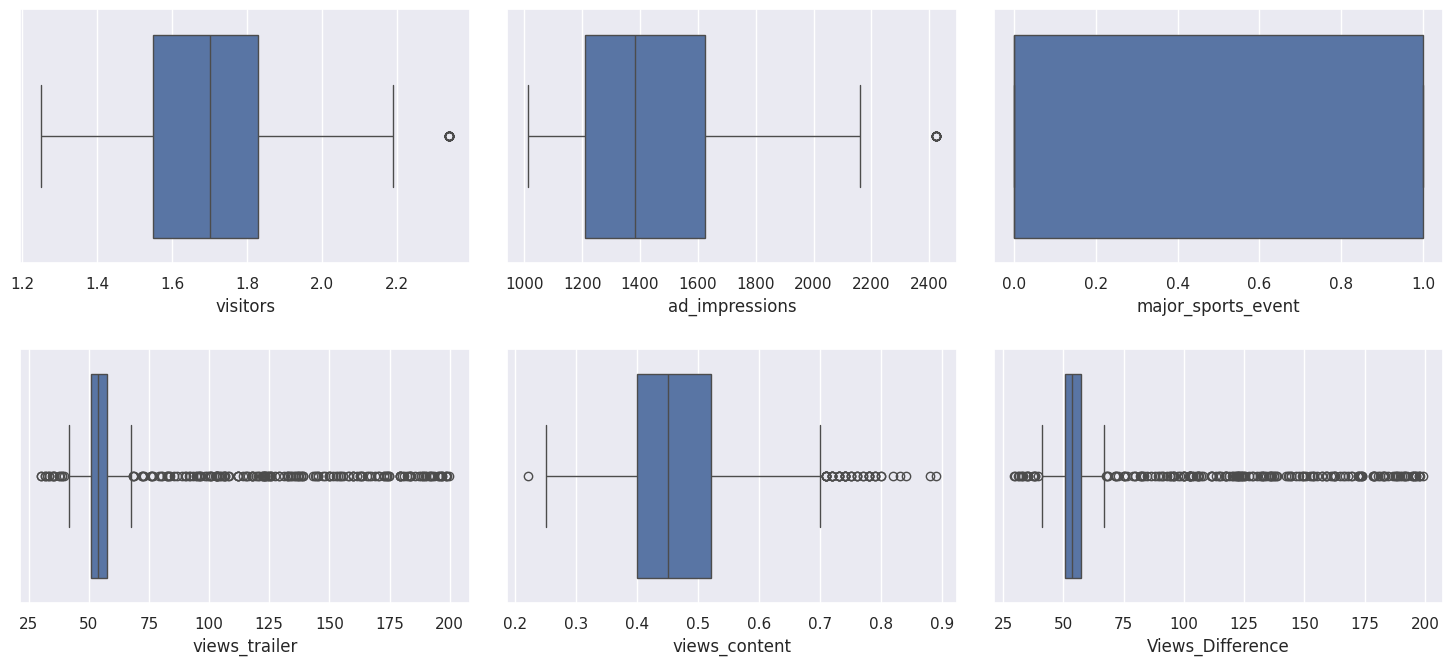

In [47]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Data preparation for modeling**

In [48]:
# defining X and y variables
X = df1.drop(["views_content"], axis=1)
y = df1["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  Views_Difference  
0          56.70             56.19  
1          52.69             52.37  
2          48.74             48.35  
3          49.81             49.37  
4          55.83             55.37  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [49]:
# let's add the intercept to data
X = sm.add_constant(X)

In [50]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,Views_Difference,genre_Comedy,genre_Drama,genre_Horror,genre_Others,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,56.19,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,52.37,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,48.35,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,49.37,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,55.37,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [51]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,Views_Difference,genre_Comedy,genre_Drama,genre_Horror,genre_Others,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,56.19,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,52.37,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,48.35,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,49.37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,55.37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Shape of Training and Test Set**

In [53]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [54]:
x_train.shape

(700, 22)

In [55]:
x_test.shape

(300, 22)

In [56]:
y_train.shape

(700,)

In [57]:
y_test.shape

(300,)

In [58]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.603e+25
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        08:41:38   Log-Likelihood:                 20110.
No. Observations:                 700   AIC:                        -4.018e+04
Df Residuals:                     678   BIC:                        -4.008e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.795e-14   3

# **Interpreting the Regression Results**

**Adjusted. R-squared: It reflects the fit of the model.**

Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for adj. R-squared is 1.00o, which is Perfect, Fit for Model

**const coefficient: It is the Y-intercept.**

It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
In our case, the value for const coefficient is -7.795e-14

Model Performance Check

In [59]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [60]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,8.069746e-14,7.636253e-14,1.0,1.0,1.629849e-11


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,8.189241e-14,7.677599e-14,1.0,1.0,1.639523e-11


Observations

The training  R2  is 1.0, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict Viewership within a mean error of 7.677599e-14 on the test data

MAPE of 1.639523e-11 on the test data means that we are able to predict around 0% of the Viewership Content

**Checking the following Linear Regression assumptions:**

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

1.   If VIF is between 1 and 5, then there is low multicollinearity.
2.   If VIF is between 5 and 10, we say there is moderate multicollinearity.
3.   If VIF is exceeding 10, it shows signs of high multicollinearity.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [63]:
checking_vif(x_train)

,feature,VIF
0,const,101.215845
1,visitors,1.434852
2,ad_impressions,1.029850
3,major_sports_event,1.432309
4,views_trailer,492170.482352
5,Views_Difference,492182.693642
6,genre_Comedy,1.921516
7,genre_Drama,1.933549
8,genre_Horror,1.908549
9,genre_Others,2.576826


There are multiple columns with very high VIF values, indicating presence of strong multicollinearity

We will systematically drop numerical columns with VIF > 5
We will ignore the VIF values for dummy variables and the constant (intercept)

To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [64]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [65]:
col_list = ["views_trailer", "Views_Difference"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Views_Difference,0.785478,0.049275
1,views_trailer,0.784475,0.049390


In [66]:
col_to_drop = "Views_Difference"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Views_Difference


,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


In [67]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          1.32e-215
Time:                        08:44:23   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

**Interpreting the Regression Results:**

std err: It reflects the level of accuracy of the coefficients.
The lower it is, the higher is the level of accuracy.
P>|t|: It is p-value.

For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

$H_o$ : Independent feature is not significant ($\beta_i = 0$)
$H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)
(P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

A p-value of less than 0.05 is considered to be statistically significant.
Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

We can see that adj. R-squared has dropped from 1.000 to 0.792, which shows that the dropped columns did not have much effect on the model
As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

**Dealing with high p-value variables**

Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
Repeat the above two steps till there are no columns with p-value > 0.05
Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [68]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [69]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [70]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          7.03e-224
Time:                        08:45:54   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [71]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [72]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**Observations**

Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with.

Now adjusted R-squared is 0.789, i.e., our model is able to explain ~79% of the variance

The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.785

This shows that the variables we dropped were not affecting the model
RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**TEST FOR LINEARITY AND INDEPENDENCE**
Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.
How to check linearity and independence?

Make a plot of fitted values vs residuals.
If they don't follow any pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.
How to fix if this assumption is not followed?

We can try to transform the variables and make the relationships linear

In [73]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          1.32e-215
Time:                        08:47:27   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [74]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.452102,-0.052102
716,0.70,0.679675,0.020325
640,0.42,0.431537,-0.011537
804,0.55,0.562329,-0.012329
737,0.59,0.552069,0.037931


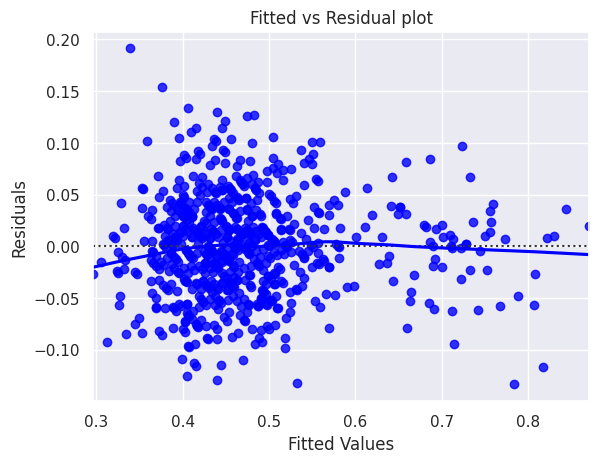

In [75]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="Blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.

**TEST FOR NORMALITY**

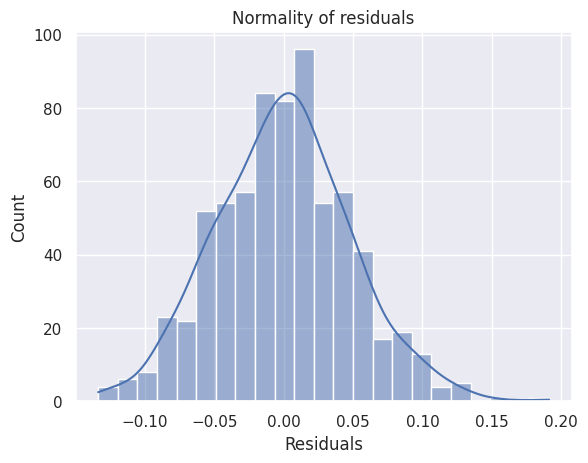

In [76]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The Above Graph Shows that The residual terms are normally distributed

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line**

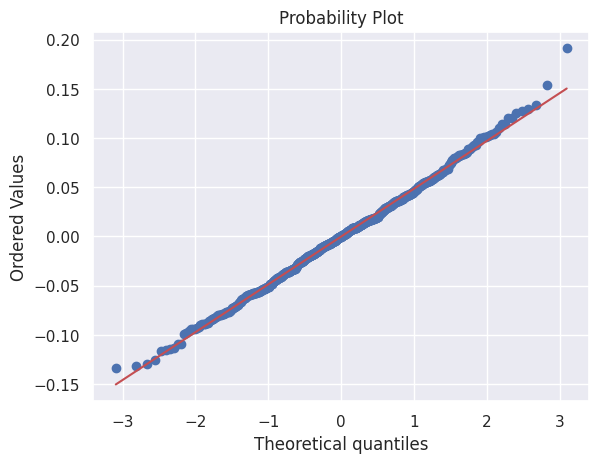

In [77]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observation :**

*   The residuals almost follow a straight line.
*   Let's check the results of the Shapiro-Wilk test.

In [78]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9972310881741868, pvalue=0.2846819817133468)

*   Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.
*   However, we can accept and consider that this distribution is being normal.
*   So, the assumption is satisfied.



**TEST FOR HOMOSCEDASTICITY**

Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

Why the test?

The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
How to check for homoscedasticity?

The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
Null hypothesis: Residuals are homoscedastic
Alternate hypothesis: Residuals have heteroscedasticity
How to fix if this assumption is not followed?

Heteroscedasticity can be fixed by adding other important features or making transformations

Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

The residuals more or less follow a straight line except for the tails.
Let's check the results of the Shapiro-Wilk test.

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.1444079593563594), ('p-value', 0.1108677095752728)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

**Predictions on test data**

In [88]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.426711
194,0.51,0.504597
314,0.48,0.428738
429,0.41,0.497126
267,0.41,0.477189
746,0.68,0.682308
186,0.62,0.592260
964,0.48,0.503956
676,0.42,0.482031
320,0.58,0.567858


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

**Final Model**

Let's recreate the final model and print it's summary to gain insights.

In [82]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [83]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          7.03e-224
Time:                        08:49:16   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [110]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [111]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


The model is able to explain ~79% of the variation in the data

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

The MAPE on the test set suggests we can predict within 9% of the Viewership

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes